<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - BTC</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>     

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_BTC.csv')
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   BTC-USD_ADJCLOSE  1826 non-null   float64
 2   BTC-USD_CLOSE     1826 non-null   float64
 3   BTC-USD_HIGH      1826 non-null   float64
 4   BTC-USD_LOW       1826 non-null   float64
 5   BTC-USD_OPEN      1826 non-null   float64
 6   BTC-USD_VOLUME    1826 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
BTC-USD_ADJCLOSE,0
BTC-USD_CLOSE,0
BTC-USD_HIGH,0
BTC-USD_LOW,0
BTC-USD_OPEN,0
BTC-USD_VOLUME,0


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC-USD_ADJCLOSE,1826.0,1.804610e+04,1.766363e+04,1.281080e+03,6.496697e+03,9.308620e+03,3.281227e+04,6.756683e+04
BTC-USD_CLOSE,1826.0,1.804610e+04,1.766363e+04,1.281080e+03,6.496697e+03,9.308620e+03,3.281227e+04,6.756683e+04
BTC-USD_HIGH,1826.0,1.850453e+04,1.812314e+04,1.294830e+03,6.601735e+03,9.460084e+03,3.393167e+04,6.878962e+04
BTC-USD_LOW,1826.0,1.750229e+04,1.713547e+04,1.265930e+03,6.398990e+03,9.144854e+03,3.127879e+04,6.638206e+04
BTC-USD_OPEN,1826.0,1.802713e+04,1.766487e+04,1.265990e+03,6.493085e+03,9.296878e+03,3.278917e+04,6.754973e+04
BTC-USD_VOLUME,1826.0,2.276132e+10,2.063458e+10,3.296310e+08,5.586124e+09,1.904227e+10,3.344625e+10,3.509679e+11


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
34,2017-05-30,2175.469971,2175.469971,2301.959961,2124.570068,2255.360107,1443970048
1108,2020-05-08,9842.666016,9842.666016,9996.743164,9767.172852,9936.162109,51780748042
343,2018-04-04,6853.839844,6853.839844,7469.879883,6803.879883,7456.410156,4936000000
1335,2020-12-21,22803.082031,22803.082031,24059.982422,22159.367188,23474.455078,45852713981
1354,2021-01-09,40254.546875,40254.546875,41436.351562,38980.875000,40788.640625,61984162837
1417,2021-03-13,61243.085938,61243.085938,61683.863281,56217.972656,57343.371094,60669829814
275,2018-01-26,11171.400391,11171.400391,11656.700195,10470.299805,11256.000000,9746199552
1407,2021-03-03,50538.242188,50538.242188,52535.136719,48274.320312,48415.816406,53220811975
347,2018-04-08,7023.520020,7023.520020,7111.560059,6919.979980,6919.979980,3652499968
240,2017-12-22,13831.799805,13831.799805,15943.400391,11833.000000,15898.000000,22197999616


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008,1.177910,2.282899
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992,2.720586,2.996948
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992,0.095711,3.010750
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984,0.298843,0.911641
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008,1.930426,2.508897


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

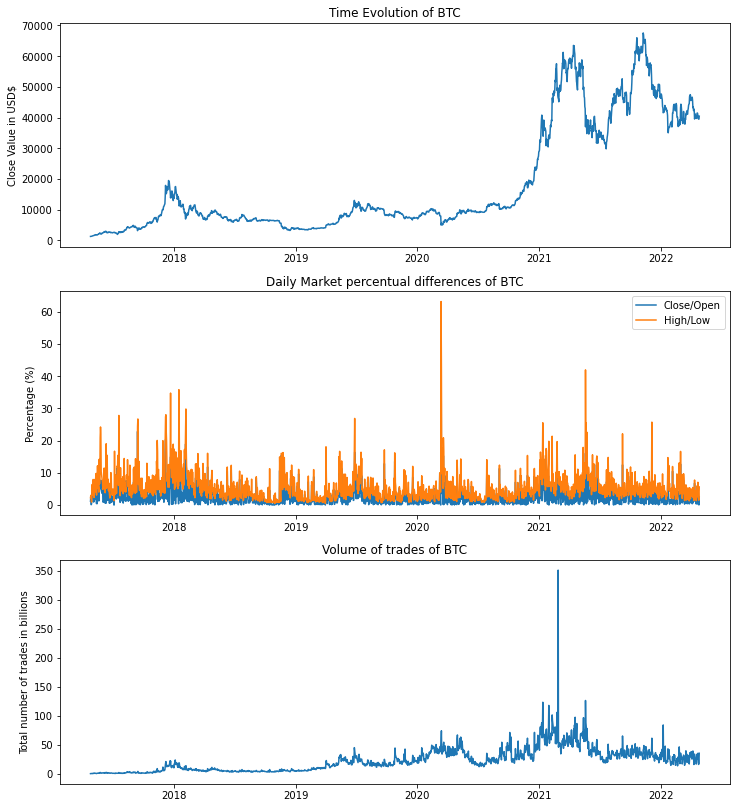

In [13]:
coin_name = plot_coinValue(df)

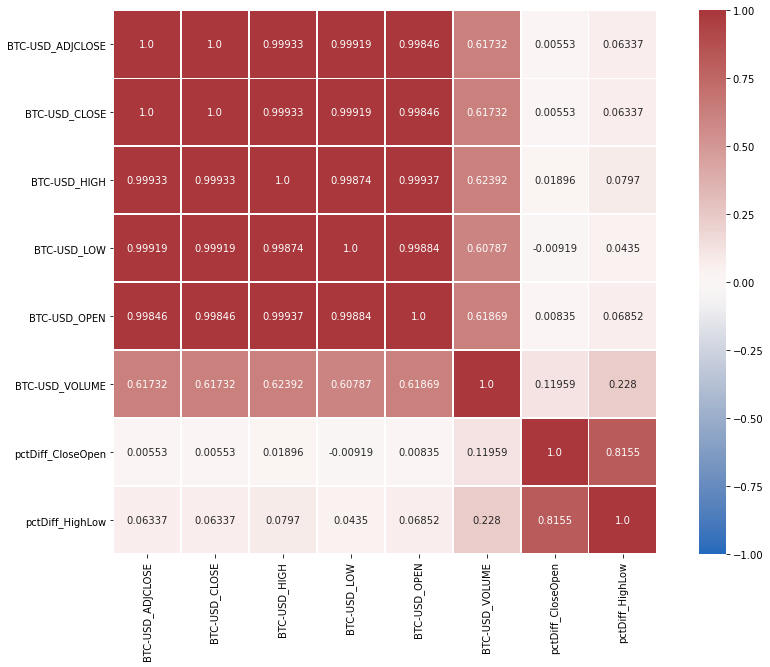

In [14]:
import seaborn as sns 

metric = df.columns #- ['Date']

# Prepare figure
fig = plt.figure(figsize=(15, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. 
corr = np.round(df[metric].corr(method="pearson"), decimals=5)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.0
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data = corr, 
            annot = annot,
            cmap = sns.color_palette("vlag", as_cmap=True),
            fmt='s',
            vmin=-1,
            vmax=1,
            center=0,
            square=True,
            linewidths=.5)

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_correlationMatrix'+'.png')

In [15]:
#FILTER DATASET
df = df.loc[df['Date']>= '2022-01-01']
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1711,2022-01-01,47686.812500,47686.812500,47827.312500,46288.484375,46311.746094,24582667004,2.883536,3.324430
1712,2022-01-02,47345.218750,47345.218750,47881.406250,46856.937500,47680.925781,27951569547,0.709062,2.186376
1713,2022-01-03,46458.117188,46458.117188,47510.726562,45835.964844,47343.542969,33071628362,1.905858,3.653816
1714,2022-01-04,45897.574219,45897.574219,47406.546875,45752.464844,46458.851562,42494677905,1.222891,3.615285
1715,2022-01-05,43569.003906,43569.003906,46929.046875,42798.222656,45899.359375,36851084859,5.348654,9.651859
...,...,...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395,2.082919,7.063114
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745,1.976690,3.719507
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249,0.638169,1.483160
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167,0.023010,1.560876


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [16]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [17]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(15, df)
windowed_df['Date'] = df.iloc[15:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue_8daysBefore,closeValue_9daysBefore,closeValue_10daysBefore,closeValue_11daysBefore,closeValue_12daysBefore,closeValue_13daysBefore,closeValue_14daysBefore,closeValue_15daysBefore,closeValue,Date
0,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,46458.117188,47345.218750,47686.812500,43113.878906,2022-01-16
1,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,46458.117188,47345.218750,42250.550781,2022-01-17
2,42250.550781,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,46458.117188,42375.632812,2022-01-18
3,42375.632812,42250.550781,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,45897.574219,41744.328125,2022-01-19
4,41744.328125,42375.632812,42250.550781,43113.878906,43177.398438,43099.699219,42591.570312,43949.101562,42735.855469,41821.261719,41911.601562,41733.941406,41557.902344,43160.929688,43569.003906,40680.417969,2022-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,42287.664062,43503.847656,43206.738281,40527.363281,2022-04-21
96,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,42287.664062,43503.847656,39740.320312,2022-04-22
97,39740.320312,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,42287.664062,39486.730469,2022-04-23
98,39486.730469,39740.320312,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,41166.730469,40127.183594,39521.902344,42207.671875,42782.136719,39469.292969,2022-04-24


In [18]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((100,), (100, 15, 1), (100,))

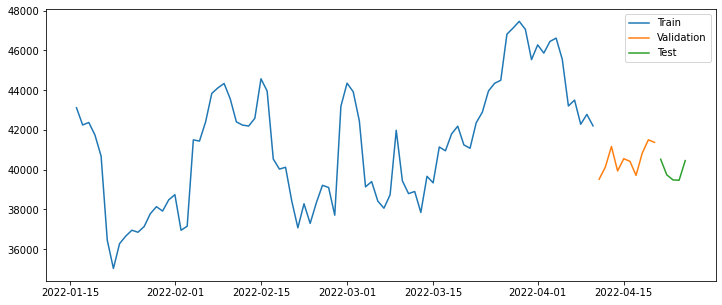

In [19]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [20]:
#!pip install tensorflow

In [21]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Function to create LSTM model and compute the MSE value for the given parameters
def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
    # create model
    model = Sequential([layers.Input((15, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
    test_predictions = model.predict(X_test).flatten()
    
    LSTM_mse = mean_squared_error(y_test, test_predictions)
    
    return LSTM_mse

#Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
    best_score = float('inf')
    
    for b in batch_size:
        for e in epochs:
            for l in learn_rate:
                print('Batch Size: ' + str(b))
                print('Number of Epochs: ' + str(e))
                print('Value of Learning Rate: ' + str(l))
                try:
                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
                    print('MSE=%.3f' % (mse))
                    if mse < best_score:
                        best_score = mse
                        top_params = [b, e, l]
                except:
                    continue
                    
    print('Best MSE=%.3f' % (best_score))
    print('Optimal Batch Size: ' + str(top_params[0]))
    print('Optimal Number of Epochs: ' + str(top_params[1]))
    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# define parameters
batch_size = [10, 100, 1000]
epochs = [50, 100]
learn_rate = np.linspace(0.001,0.1, num=10)

warnings.filterwarnings("ignore")
search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
9/9 - 2s - loss: 1709711232.0000 - mean_absolute_error: 41234.8359 - val_loss: 1641871872.0000 - val_mean_absolute_error: 40514.6484 - 2s/epoch - 171ms/step
Epoch 2/50
9/9 - 0s - loss: 1709658112.0000 - mean_absolute_error: 41234.1836 - val_loss: 1641829632.0000 - val_mean_absolute_error: 40514.1250 - 46ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1709618560.0000 - mean_absolute_error: 41233.7031 - val_loss: 1641792256.0000 - val_mean_absolute_error: 40513.6641 - 45ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1709578880.0000 - mean_absolute_error: 41233.2266 - val_loss: 1641748480.0000 - val_mean_absolute_error: 40513.1250 - 44ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 1709529344.0000 - mean_absolute_error: 41232.6250 - val_loss: 1641691904.0000 - val_mean_absolute_error: 40512.4219 - 43ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 1709464192.0000 - mean_absolute_error: 41231.8398 - val_loss: 1641

Epoch 50/50
9/9 - 0s - loss: 1559012864.0000 - mean_absolute_error: 39366.4688 - val_loss: 1488752512.0000 - val_mean_absolute_error: 38578.7109 - 43ms/epoch - 5ms/step
MSE=1444228096.000
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.012
Epoch 1/50
9/9 - 1s - loss: 1709506944.0000 - mean_absolute_error: 41232.4258 - val_loss: 1641248768.0000 - val_mean_absolute_error: 40506.9531 - 1s/epoch - 154ms/step
Epoch 2/50
9/9 - 0s - loss: 1708207232.0000 - mean_absolute_error: 41216.8984 - val_loss: 1638809984.0000 - val_mean_absolute_error: 40476.8438 - 45ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1704243840.0000 - mean_absolute_error: 41169.3164 - val_loss: 1632459136.0000 - val_mean_absolute_error: 40398.3125 - 43ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1694990976.0000 - mean_absolute_error: 41057.7383 - val_loss: 1618972416.0000 - val_mean_absolute_error: 40231.0430 - 43ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 1676666496.0000 - mean_absolute_error: 40835.5

Epoch 50/50
9/9 - 0s - loss: 9540200.0000 - mean_absolute_error: 2624.6582 - val_loss: 1119413.0000 - val_mean_absolute_error: 865.6445 - 43ms/epoch - 5ms/step
MSE=2191675.000
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.023000000000000003
Epoch 1/50
9/9 - 1s - loss: 1708757888.0000 - mean_absolute_error: 41223.6992 - val_loss: 1638272640.0000 - val_mean_absolute_error: 40470.1992 - 1s/epoch - 154ms/step
Epoch 2/50
9/9 - 0s - loss: 1699997056.0000 - mean_absolute_error: 41119.1875 - val_loss: 1620020736.0000 - val_mean_absolute_error: 40244.0703 - 44ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1668316544.0000 - mean_absolute_error: 40736.6406 - val_loss: 1566623488.0000 - val_mean_absolute_error: 39575.0938 - 43ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1587925760.0000 - mean_absolute_error: 39745.9414 - val_loss: 1446793600.0000 - val_mean_absolute_error: 38031.0156 - 43ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 1424199680.0000 - mean_absolute_error: 3764

MSE=2304239.750
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.034
Epoch 1/50
9/9 - 1s - loss: 1708912896.0000 - mean_absolute_error: 41225.5195 - val_loss: 1638622848.0000 - val_mean_absolute_error: 40474.5312 - 1s/epoch - 155ms/step
Epoch 2/50
9/9 - 0s - loss: 1700264576.0000 - mean_absolute_error: 41122.5156 - val_loss: 1619588096.0000 - val_mean_absolute_error: 40238.6953 - 46ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1665678336.0000 - mean_absolute_error: 40705.0703 - val_loss: 1559308032.0000 - val_mean_absolute_error: 39482.5625 - 45ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1573090944.0000 - mean_absolute_error: 39561.1406 - val_loss: 1419245184.0000 - val_mean_absolute_error: 37667.0859 - 45ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 1380465920.0000 - mean_absolute_error: 37059.7539 - val_loss: 1159097600.0000 - val_mean_absolute_error: 34039.1250 - 45ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 1055111872.0000 - mean_absolute_error: 32382.9668 

9/9 - 1s - loss: 1705829376.0000 - mean_absolute_error: 41189.6094 - val_loss: 1625365888.0000 - val_mean_absolute_error: 40310.4297 - 1s/epoch - 154ms/step
Epoch 2/50
9/9 - 0s - loss: 1661460608.0000 - mean_absolute_error: 40657.2305 - val_loss: 1528530816.0000 - val_mean_absolute_error: 39090.8594 - 43ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1491020160.0000 - mean_absolute_error: 38523.1953 - val_loss: 1244441600.0000 - val_mean_absolute_error: 35270.4688 - 44ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1083778176.0000 - mean_absolute_error: 32818.3008 - val_loss: 695021440.0000 - val_mean_absolute_error: 26355.0000 - 45ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 448834752.0000 - mean_absolute_error: 20868.0566 - val_loss: 97491392.0000 - val_mean_absolute_error: 9851.6973 - 55ms/epoch - 6ms/step
Epoch 6/50
9/9 - 0s - loss: 24603542.0000 - mean_absolute_error: 3884.6841 - val_loss: 64802804.0000 - val_mean_absolute_error: 8022.9248 - 46ms/epoch - 5ms/step
Epoch 7/50
9/9

MSE=2485338.500
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.05600000000000001
Epoch 1/50
9/9 - 1s - loss: 1708320128.0000 - mean_absolute_error: 41218.6484 - val_loss: 1635664768.0000 - val_mean_absolute_error: 40437.9688 - 1s/epoch - 154ms/step
Epoch 2/50
9/9 - 0s - loss: 1690264448.0000 - mean_absolute_error: 41003.4570 - val_loss: 1594365184.0000 - val_mean_absolute_error: 39924.0469 - 44ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1614348160.0000 - mean_absolute_error: 40078.0000 - val_loss: 1461972352.0000 - val_mean_absolute_error: 38230.0547 - 45ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1413495808.0000 - mean_absolute_error: 37504.9805 - val_loss: 1165812736.0000 - val_mean_absolute_error: 34137.6250 - 44ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 1022901312.0000 - mean_absolute_error: 31879.6797 - val_loss: 677788288.0000 - val_mean_absolute_error: 26026.0039 - 43ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 476406048.0000 - mean_absolute_error:

MSE=2396904.500
Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.067
Epoch 1/50
9/9 - 1s - loss: 1704792448.0000 - mean_absolute_error: 41177.6055 - val_loss: 1619751040.0000 - val_mean_absolute_error: 40240.7188 - 1s/epoch - 155ms/step
Epoch 2/50
9/9 - 0s - loss: 1641953920.0000 - mean_absolute_error: 40421.2930 - val_loss: 1479201024.0000 - val_mean_absolute_error: 38454.7188 - 44ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1392974336.0000 - mean_absolute_error: 37235.8828 - val_loss: 1067788928.0000 - val_mean_absolute_error: 32670.3750 - 43ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 824322240.0000 - mean_absolute_error: 28543.7617 - val_loss: 363952832.0000 - val_mean_absolute_error: 19066.1309 - 45ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 143180432.0000 - mean_absolute_error: 10833.8154 - val_loss: 11626250.0000 - val_mean_absolute_error: 3345.2610 - 43ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 68167184.0000 - mean_absolute_error: 7672.7793 - val_los

9/9 - 2s - loss: 1693942528.0000 - mean_absolute_error: 41050.9805 - val_loss: 1569408128.0000 - val_mean_absolute_error: 39610.2578 - 2s/epoch - 180ms/step
Epoch 2/50
9/9 - 0s - loss: 1489630848.0000 - mean_absolute_error: 38512.3984 - val_loss: 1127368064.0000 - val_mean_absolute_error: 33569.8203 - 48ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 785227904.0000 - mean_absolute_error: 27725.2852 - val_loss: 198648144.0000 - val_mean_absolute_error: 14078.8018 - 46ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 55792176.0000 - mean_absolute_error: 6455.2583 - val_loss: 187692128.0000 - val_mean_absolute_error: 13684.1748 - 45ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 118830432.0000 - mean_absolute_error: 9497.2900 - val_loss: 666609.8125 - val_mean_absolute_error: 692.1016 - 47ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 35456128.0000 - mean_absolute_error: 5004.1616 - val_loss: 20832492.0000 - val_mean_absolute_error: 4516.3057 - 47ms/epoch - 5ms/step
Epoch 7/50
9/9 - 0s - l

Epoch 2/50
9/9 - 0s - loss: 1665667584.0000 - mean_absolute_error: 40709.0078 - val_loss: 1529998976.0000 - val_mean_absolute_error: 39109.6328 - 46ms/epoch - 5ms/step
Epoch 3/50
9/9 - 0s - loss: 1480409088.0000 - mean_absolute_error: 38387.6758 - val_loss: 1207867264.0000 - val_mean_absolute_error: 34748.1172 - 45ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 1010180480.0000 - mean_absolute_error: 31665.2832 - val_loss: 574165568.0000 - val_mean_absolute_error: 23952.6621 - 45ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 310124352.0000 - mean_absolute_error: 17048.9629 - val_loss: 15454925.0000 - val_mean_absolute_error: 3875.4929 - 45ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 27866212.0000 - mean_absolute_error: 4438.4902 - val_loss: 110369048.0000 - val_mean_absolute_error: 10484.9199 - 47ms/epoch - 5ms/step
Epoch 7/50
9/9 - 0s - loss: 71712488.0000 - mean_absolute_error: 7356.4609 - val_loss: 4462678.0000 - val_mean_absolute_error: 2006.7883 - 45ms/epoch - 5ms/step
Epoch 8/

Epoch 3/50
9/9 - 0s - loss: 1227492224.0000 - mean_absolute_error: 34937.6445 - val_loss: 769488704.0000 - val_mean_absolute_error: 27731.8086 - 45ms/epoch - 5ms/step
Epoch 4/50
9/9 - 0s - loss: 431804992.0000 - mean_absolute_error: 20186.8652 - val_loss: 23770988.0000 - val_mean_absolute_error: 4830.6846 - 46ms/epoch - 5ms/step
Epoch 5/50
9/9 - 0s - loss: 45607220.0000 - mean_absolute_error: 5679.5884 - val_loss: 144551168.0000 - val_mean_absolute_error: 12004.8184 - 46ms/epoch - 5ms/step
Epoch 6/50
9/9 - 0s - loss: 75371184.0000 - mean_absolute_error: 7476.1978 - val_loss: 913544.0000 - val_mean_absolute_error: 773.0656 - 47ms/epoch - 5ms/step
Epoch 7/50
9/9 - 0s - loss: 28991114.0000 - mean_absolute_error: 4500.7661 - val_loss: 12069633.0000 - val_mean_absolute_error: 3410.8875 - 45ms/epoch - 5ms/step
Epoch 8/50
9/9 - 0s - loss: 10733166.0000 - mean_absolute_error: 2552.1868 - val_loss: 4411075.5000 - val_mean_absolute_error: 1993.8899 - 46ms/epoch - 5ms/step
Epoch 9/50
9/9 - 0s - l

Epoch 4/100
9/9 - 0s - loss: 1709386624.0000 - mean_absolute_error: 41230.9102 - val_loss: 1641511168.0000 - val_mean_absolute_error: 40510.1953 - 46ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 1709244032.0000 - mean_absolute_error: 41229.1836 - val_loss: 1641349888.0000 - val_mean_absolute_error: 40508.2031 - 46ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 1709061120.0000 - mean_absolute_error: 41226.9688 - val_loss: 1641142912.0000 - val_mean_absolute_error: 40505.6484 - 46ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 1708825216.0000 - mean_absolute_error: 41224.1133 - val_loss: 1640874112.0000 - val_mean_absolute_error: 40502.3281 - 45ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 1708519680.0000 - mean_absolute_error: 41220.4219 - val_loss: 1640532736.0000 - val_mean_absolute_error: 40498.1172 - 45ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 1708138752.0000 - mean_absolute_error: 41215.8125 - val_loss: 1640111744.0000 - val_mean_absolute_error: 40492.9141 - 45ms/epo

Epoch 53/100
9/9 - 0s - loss: 1456530816.0000 - mean_absolute_error: 38043.2930 - val_loss: 1385727232.0000 - val_mean_absolute_error: 37219.5078 - 45ms/epoch - 5ms/step
Epoch 54/100
9/9 - 0s - loss: 1442840704.0000 - mean_absolute_error: 37863.0078 - val_loss: 1372075904.0000 - val_mean_absolute_error: 37035.6641 - 47ms/epoch - 5ms/step
Epoch 55/100
9/9 - 0s - loss: 1428753792.0000 - mean_absolute_error: 37676.5977 - val_loss: 1358039168.0000 - val_mean_absolute_error: 36845.6719 - 45ms/epoch - 5ms/step
Epoch 56/100
9/9 - 0s - loss: 1414274048.0000 - mean_absolute_error: 37484.0234 - val_loss: 1343620608.0000 - val_mean_absolute_error: 36649.4922 - 45ms/epoch - 5ms/step
Epoch 57/100
9/9 - 0s - loss: 1399405952.0000 - mean_absolute_error: 37285.2383 - val_loss: 1328825088.0000 - val_mean_absolute_error: 36447.0781 - 46ms/epoch - 5ms/step
Epoch 58/100
9/9 - 0s - loss: 1384153984.0000 - mean_absolute_error: 37080.2188 - val_loss: 1313658112.0000 - val_mean_absolute_error: 36238.4141 - 45

9/9 - 2s - loss: 1709314176.0000 - mean_absolute_error: 41230.1523 - val_loss: 1640785920.0000 - val_mean_absolute_error: 40501.2422 - 2s/epoch - 175ms/step
Epoch 2/100
9/9 - 0s - loss: 1707350272.0000 - mean_absolute_error: 41206.6445 - val_loss: 1637270400.0000 - val_mean_absolute_error: 40457.8203 - 46ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 1701777792.0000 - mean_absolute_error: 41139.6719 - val_loss: 1628524288.0000 - val_mean_absolute_error: 40349.5859 - 44ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 1689207552.0000 - mean_absolute_error: 40987.8555 - val_loss: 1610423168.0000 - val_mean_absolute_error: 40124.6562 - 44ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 1664817024.0000 - mean_absolute_error: 40691.2266 - val_loss: 1577472768.0000 - val_mean_absolute_error: 39711.9297 - 47ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 1622535680.0000 - mean_absolute_error: 40171.1953 - val_loss: 1523228288.0000 - val_mean_absolute_error: 39022.9766 - 44ms/epoch - 5ms/ste

Epoch 52/100
9/9 - 0s - loss: 9559215.0000 - mean_absolute_error: 2626.6086 - val_loss: 1124215.2500 - val_mean_absolute_error: 867.3836 - 45ms/epoch - 5ms/step
Epoch 53/100
9/9 - 0s - loss: 9560575.0000 - mean_absolute_error: 2626.7478 - val_loss: 1124552.5000 - val_mean_absolute_error: 867.5055 - 44ms/epoch - 5ms/step
Epoch 54/100
9/9 - 0s - loss: 9561913.0000 - mean_absolute_error: 2626.8850 - val_loss: 1124883.2500 - val_mean_absolute_error: 867.6250 - 44ms/epoch - 5ms/step
Epoch 55/100
9/9 - 0s - loss: 9563243.0000 - mean_absolute_error: 2627.0212 - val_loss: 1125214.2500 - val_mean_absolute_error: 867.7445 - 45ms/epoch - 5ms/step
Epoch 56/100
9/9 - 0s - loss: 9564545.0000 - mean_absolute_error: 2627.1541 - val_loss: 1125545.1250 - val_mean_absolute_error: 867.8641 - 44ms/epoch - 5ms/step
Epoch 57/100
9/9 - 0s - loss: 9565850.0000 - mean_absolute_error: 2627.2871 - val_loss: 1125869.7500 - val_mean_absolute_error: 867.9813 - 44ms/epoch - 5ms/step
Epoch 58/100
9/9 - 0s - loss: 9567

Epoch 3/100
9/9 - 0s - loss: 1686374912.0000 - mean_absolute_error: 40954.7969 - val_loss: 1599324800.0000 - val_mean_absolute_error: 39986.1172 - 47ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 1640439680.0000 - mean_absolute_error: 40395.1250 - val_loss: 1530084736.0000 - val_mean_absolute_error: 39110.7305 - 47ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 1544573184.0000 - mean_absolute_error: 39198.4258 - val_loss: 1398157056.0000 - val_mean_absolute_error: 37386.1172 - 46ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 1374635264.0000 - mean_absolute_error: 36977.3203 - val_loss: 1182409984.0000 - val_mean_absolute_error: 34379.8555 - 47ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 1114363776.0000 - mean_absolute_error: 33281.9570 - val_loss: 878603904.0000 - val_mean_absolute_error: 29633.9062 - 45ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 772875520.0000 - mean_absolute_error: 27683.6152 - val_loss: 520214336.0000 - val_mean_absolute_error: 22798.6602 - 45ms/epoch 

Epoch 54/100
9/9 - 0s - loss: 9729241.0000 - mean_absolute_error: 2644.4070 - val_loss: 1167551.5000 - val_mean_absolute_error: 882.8102 - 47ms/epoch - 5ms/step
Epoch 55/100
9/9 - 0s - loss: 9731619.0000 - mean_absolute_error: 2644.6616 - val_loss: 1168153.2500 - val_mean_absolute_error: 883.0211 - 49ms/epoch - 5ms/step
Epoch 56/100
9/9 - 0s - loss: 9733951.0000 - mean_absolute_error: 2644.9097 - val_loss: 1168741.7500 - val_mean_absolute_error: 883.2274 - 47ms/epoch - 5ms/step
Epoch 57/100
9/9 - 0s - loss: 9736263.0000 - mean_absolute_error: 2645.1570 - val_loss: 1169330.7500 - val_mean_absolute_error: 883.4336 - 47ms/epoch - 5ms/step
Epoch 58/100
9/9 - 0s - loss: 9738522.0000 - mean_absolute_error: 2645.3970 - val_loss: 1169906.3750 - val_mean_absolute_error: 883.6351 - 48ms/epoch - 5ms/step
Epoch 59/100
9/9 - 0s - loss: 9740764.0000 - mean_absolute_error: 2645.6365 - val_loss: 1170455.5000 - val_mean_absolute_error: 883.8273 - 47ms/epoch - 5ms/step
Epoch 60/100
9/9 - 0s - loss: 9742

Epoch 5/100
9/9 - 0s - loss: 1278181376.0000 - mean_absolute_error: 35658.0508 - val_loss: 1022425472.0000 - val_mean_absolute_error: 31968.5781 - 45ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 886955264.0000 - mean_absolute_error: 29670.7266 - val_loss: 576100992.0000 - val_mean_absolute_error: 23993.0312 - 46ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 413649216.0000 - mean_absolute_error: 20128.8066 - val_loss: 152028960.0000 - val_mean_absolute_error: 12312.3311 - 45ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 66519360.0000 - mean_absolute_error: 7507.0669 - val_loss: 796561.3750 - val_mean_absolute_error: 740.1578 - 44ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 17619094.0000 - mean_absolute_error: 3483.3699 - val_loss: 42891688.0000 - val_mean_absolute_error: 6515.8428 - 44ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 37306016.0000 - mean_absolute_error: 5295.3457 - val_loss: 12846176.0000 - val_mean_absolute_error: 3522.8821 - 44ms/epoch - 5ms/step
Epoch 11/1

Epoch 56/100
9/9 - 0s - loss: 9900096.0000 - mean_absolute_error: 2662.4167 - val_loss: 1211714.1250 - val_mean_absolute_error: 902.3922 - 51ms/epoch - 6ms/step
Epoch 57/100
9/9 - 0s - loss: 9903319.0000 - mean_absolute_error: 2662.7522 - val_loss: 1212526.5000 - val_mean_absolute_error: 902.7609 - 52ms/epoch - 6ms/step
Epoch 58/100
9/9 - 0s - loss: 9906476.0000 - mean_absolute_error: 2663.0806 - val_loss: 1213332.3750 - val_mean_absolute_error: 903.1266 - 53ms/epoch - 6ms/step
Epoch 59/100
9/9 - 0s - loss: 9909580.0000 - mean_absolute_error: 2663.4019 - val_loss: 1214138.8750 - val_mean_absolute_error: 903.4922 - 54ms/epoch - 6ms/step
Epoch 60/100
9/9 - 0s - loss: 9912629.0000 - mean_absolute_error: 2663.7178 - val_loss: 1214918.0000 - val_mean_absolute_error: 903.8453 - 53ms/epoch - 6ms/step
Epoch 61/100
9/9 - 0s - loss: 9915631.0000 - mean_absolute_error: 2664.0293 - val_loss: 1215683.7500 - val_mean_absolute_error: 904.1922 - 51ms/epoch - 6ms/step
Epoch 62/100
9/9 - 0s - loss: 9918

9/9 - 0s - loss: 467068672.0000 - mean_absolute_error: 21382.3965 - val_loss: 154068912.0000 - val_mean_absolute_error: 12394.8955 - 46ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 54656740.0000 - mean_absolute_error: 6398.4009 - val_loss: 10707147.0000 - val_mean_absolute_error: 3204.9446 - 45ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 39136320.0000 - mean_absolute_error: 5618.5259 - val_loss: 56086656.0000 - val_mean_absolute_error: 7459.9717 - 45ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 37809092.0000 - mean_absolute_error: 5230.3667 - val_loss: 3251763.2500 - val_mean_absolute_error: 1678.1790 - 46ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 14524113.0000 - mean_absolute_error: 3107.8860 - val_loss: 2483532.7500 - val_mean_absolute_error: 1431.1023 - 46ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 12592278.0000 - mean_absolute_error: 2894.4675 - val_loss: 545887.5000 - val_mean_absolute_error: 618.1110 - 45ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 831

Epoch 57/100
9/9 - 0s - loss: 10042894.0000 - mean_absolute_error: 2677.3936 - val_loss: 1249046.1250 - val_mean_absolute_error: 919.1422 - 46ms/epoch - 5ms/step
Epoch 58/100
9/9 - 0s - loss: 10046776.0000 - mean_absolute_error: 2677.8333 - val_loss: 1250054.1250 - val_mean_absolute_error: 919.5891 - 46ms/epoch - 5ms/step
Epoch 59/100
9/9 - 0s - loss: 10050599.0000 - mean_absolute_error: 2678.2666 - val_loss: 1251041.5000 - val_mean_absolute_error: 920.0266 - 45ms/epoch - 5ms/step
Epoch 60/100
9/9 - 0s - loss: 10054332.0000 - mean_absolute_error: 2678.6885 - val_loss: 1252001.3750 - val_mean_absolute_error: 920.4515 - 46ms/epoch - 5ms/step
Epoch 61/100
9/9 - 0s - loss: 10058002.0000 - mean_absolute_error: 2679.1030 - val_loss: 1252954.7500 - val_mean_absolute_error: 920.8734 - 45ms/epoch - 5ms/step
Epoch 62/100
9/9 - 0s - loss: 10061613.0000 - mean_absolute_error: 2679.5122 - val_loss: 1253880.2500 - val_mean_absolute_error: 921.2828 - 46ms/epoch - 5ms/step
Epoch 63/100
9/9 - 0s - loss

Epoch 7/100
9/9 - 0s - loss: 33702048.0000 - mean_absolute_error: 4856.0757 - val_loss: 4965961.0000 - val_mean_absolute_error: 2128.4929 - 46ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 23110318.0000 - mean_absolute_error: 3968.2756 - val_loss: 4390111.5000 - val_mean_absolute_error: 1988.6257 - 45ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 8014546.0000 - mean_absolute_error: 2395.3486 - val_loss: 4583237.0000 - val_mean_absolute_error: 2036.6047 - 45ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 12428768.0000 - mean_absolute_error: 2893.8003 - val_loss: 3890805.2500 - val_mean_absolute_error: 1858.8508 - 45ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 11954175.0000 - mean_absolute_error: 2867.2585 - val_loss: 495312.1562 - val_mean_absolute_error: 610.9703 - 46ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 9857052.0000 - mean_absolute_error: 2688.8835 - val_loss: 838320.8750 - val_mean_absolute_error: 753.6766 - 46ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss: 9

Epoch 58/100
9/9 - 0s - loss: 10482404.0000 - mean_absolute_error: 2727.8628 - val_loss: 1366717.3750 - val_mean_absolute_error: 969.5641 - 46ms/epoch - 5ms/step
Epoch 59/100
9/9 - 0s - loss: 10488601.0000 - mean_absolute_error: 2728.5671 - val_loss: 1368361.6250 - val_mean_absolute_error: 970.2453 - 45ms/epoch - 5ms/step
Epoch 60/100
9/9 - 0s - loss: 10494658.0000 - mean_absolute_error: 2729.2571 - val_loss: 1369969.5000 - val_mean_absolute_error: 970.9109 - 47ms/epoch - 5ms/step
Epoch 61/100
9/9 - 0s - loss: 10500579.0000 - mean_absolute_error: 2729.9297 - val_loss: 1371563.7500 - val_mean_absolute_error: 971.5703 - 46ms/epoch - 5ms/step
Epoch 62/100
9/9 - 0s - loss: 10506399.0000 - mean_absolute_error: 2730.5903 - val_loss: 1373121.5000 - val_mean_absolute_error: 972.2141 - 45ms/epoch - 5ms/step
Epoch 63/100
9/9 - 0s - loss: 10512105.0000 - mean_absolute_error: 2731.2383 - val_loss: 1374627.5000 - val_mean_absolute_error: 972.8359 - 45ms/epoch - 5ms/step
Epoch 64/100
9/9 - 0s - loss

Epoch 8/100
9/9 - 0s - loss: 9018206.0000 - mean_absolute_error: 2600.2349 - val_loss: 11393332.0000 - val_mean_absolute_error: 3310.2649 - 46ms/epoch - 5ms/step
Epoch 9/100
9/9 - 0s - loss: 15805895.0000 - mean_absolute_error: 3288.0398 - val_loss: 492664.7500 - val_mean_absolute_error: 609.8758 - 46ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 11044999.0000 - mean_absolute_error: 2802.5764 - val_loss: 508583.0938 - val_mean_absolute_error: 616.1242 - 44ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 8913145.0000 - mean_absolute_error: 2570.6057 - val_loss: 2687481.0000 - val_mean_absolute_error: 1500.6672 - 43ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 11134395.0000 - mean_absolute_error: 2775.8374 - val_loss: 1132885.1250 - val_mean_absolute_error: 870.5078 - 44ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss: 10335772.0000 - mean_absolute_error: 2724.5503 - val_loss: 1008964.3125 - val_mean_absolute_error: 823.8156 - 44ms/epoch - 5ms/step
Epoch 14/100
9/9 - 0s - loss: 9

Epoch 59/100
9/9 - 0s - loss: 10965995.0000 - mean_absolute_error: 2783.9500 - val_loss: 1501388.2500 - val_mean_absolute_error: 1032.4290 - 44ms/epoch - 5ms/step
Epoch 60/100
9/9 - 0s - loss: 10974856.0000 - mean_absolute_error: 2784.9612 - val_loss: 1503849.7500 - val_mean_absolute_error: 1033.6204 - 46ms/epoch - 5ms/step
Epoch 61/100
9/9 - 0s - loss: 10983565.0000 - mean_absolute_error: 2785.9548 - val_loss: 1506249.3750 - val_mean_absolute_error: 1034.7805 - 44ms/epoch - 5ms/step
Epoch 62/100
9/9 - 0s - loss: 10992066.0000 - mean_absolute_error: 2786.9229 - val_loss: 1508619.3750 - val_mean_absolute_error: 1035.9250 - 45ms/epoch - 5ms/step
Epoch 63/100
9/9 - 0s - loss: 11000420.0000 - mean_absolute_error: 2787.8738 - val_loss: 1510927.2500 - val_mean_absolute_error: 1037.0383 - 43ms/epoch - 5ms/step
Epoch 64/100
9/9 - 0s - loss: 11008584.0000 - mean_absolute_error: 2788.8018 - val_loss: 1513205.0000 - val_mean_absolute_error: 1038.1360 - 43ms/epoch - 5ms/step
Epoch 65/100
9/9 - 0s 

Epoch 9/100
9/9 - 0s - loss: 10130403.0000 - mean_absolute_error: 2575.8745 - val_loss: 2399306.5000 - val_mean_absolute_error: 1401.3665 - 44ms/epoch - 5ms/step
Epoch 10/100
9/9 - 0s - loss: 10928331.0000 - mean_absolute_error: 2727.2363 - val_loss: 5243405.0000 - val_mean_absolute_error: 2192.6985 - 46ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 12390506.0000 - mean_absolute_error: 2900.1272 - val_loss: 649456.5625 - val_mean_absolute_error: 684.8281 - 44ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 10256715.0000 - mean_absolute_error: 2732.2993 - val_loss: 633482.1875 - val_mean_absolute_error: 677.7875 - 44ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss: 9241030.0000 - mean_absolute_error: 2604.6467 - val_loss: 1759810.6250 - val_mean_absolute_error: 1150.7961 - 44ms/epoch - 5ms/step
Epoch 14/100
9/9 - 0s - loss: 10236850.0000 - mean_absolute_error: 2689.6023 - val_loss: 1431005.6250 - val_mean_absolute_error: 997.7609 - 45ms/epoch - 5ms/step
Epoch 15/100
9/9 - 0s - loss:

Epoch 60/100
9/9 - 0s - loss: 10461752.0000 - mean_absolute_error: 2725.5034 - val_loss: 1361124.2500 - val_mean_absolute_error: 967.2422 - 44ms/epoch - 5ms/step
Epoch 61/100
9/9 - 0s - loss: 10467482.0000 - mean_absolute_error: 2726.1575 - val_loss: 1362658.2500 - val_mean_absolute_error: 967.8797 - 45ms/epoch - 5ms/step
Epoch 62/100
9/9 - 0s - loss: 10473137.0000 - mean_absolute_error: 2726.8025 - val_loss: 1364163.3750 - val_mean_absolute_error: 968.5047 - 44ms/epoch - 5ms/step
Epoch 63/100
9/9 - 0s - loss: 10478644.0000 - mean_absolute_error: 2727.4304 - val_loss: 1365624.3750 - val_mean_absolute_error: 969.1110 - 44ms/epoch - 5ms/step
Epoch 64/100
9/9 - 0s - loss: 10484049.0000 - mean_absolute_error: 2728.0459 - val_loss: 1367086.7500 - val_mean_absolute_error: 969.7172 - 44ms/epoch - 5ms/step
Epoch 65/100
9/9 - 0s - loss: 10489379.0000 - mean_absolute_error: 2728.6526 - val_loss: 1368497.3750 - val_mean_absolute_error: 970.3016 - 44ms/epoch - 5ms/step
Epoch 66/100
9/9 - 0s - loss

Epoch 10/100
9/9 - 0s - loss: 9864790.0000 - mean_absolute_error: 2644.5166 - val_loss: 2876089.0000 - val_mean_absolute_error: 1562.2454 - 45ms/epoch - 5ms/step
Epoch 11/100
9/9 - 0s - loss: 11757570.0000 - mean_absolute_error: 2857.7502 - val_loss: 689277.3750 - val_mean_absolute_error: 701.3109 - 46ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 9788917.0000 - mean_absolute_error: 2670.0188 - val_loss: 1664691.0000 - val_mean_absolute_error: 1108.6985 - 46ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss: 10644304.0000 - mean_absolute_error: 2738.2175 - val_loss: 1446169.7500 - val_mean_absolute_error: 1005.3312 - 45ms/epoch - 5ms/step
Epoch 14/100
9/9 - 0s - loss: 10668853.0000 - mean_absolute_error: 2750.4580 - val_loss: 1212189.1250 - val_mean_absolute_error: 902.6078 - 47ms/epoch - 5ms/step
Epoch 15/100
9/9 - 0s - loss: 10348292.0000 - mean_absolute_error: 2714.7622 - val_loss: 1539700.3750 - val_mean_absolute_error: 1050.8196 - 46ms/epoch - 5ms/step
Epoch 16/100
9/9 - 0s - los

Epoch 61/100
9/9 - 0s - loss: 11528770.0000 - mean_absolute_error: 2846.1292 - val_loss: 1664743.0000 - val_mean_absolute_error: 1108.7219 - 46ms/epoch - 5ms/step
Epoch 62/100
9/9 - 0s - loss: 11540146.0000 - mean_absolute_error: 2847.3442 - val_loss: 1668036.6250 - val_mean_absolute_error: 1110.2063 - 45ms/epoch - 5ms/step
Epoch 63/100
9/9 - 0s - loss: 11551265.0000 - mean_absolute_error: 2848.5293 - val_loss: 1671265.2500 - val_mean_absolute_error: 1111.6594 - 46ms/epoch - 5ms/step
Epoch 64/100
9/9 - 0s - loss: 11562171.0000 - mean_absolute_error: 2849.6914 - val_loss: 1674420.0000 - val_mean_absolute_error: 1113.0774 - 46ms/epoch - 5ms/step
Epoch 65/100
9/9 - 0s - loss: 11572826.0000 - mean_absolute_error: 2850.8240 - val_loss: 1677526.2500 - val_mean_absolute_error: 1114.4719 - 45ms/epoch - 5ms/step
Epoch 66/100
9/9 - 0s - loss: 11583291.0000 - mean_absolute_error: 2851.9360 - val_loss: 1680566.7500 - val_mean_absolute_error: 1115.8352 - 47ms/epoch - 5ms/step
Epoch 67/100
9/9 - 0s 

Epoch 11/100
9/9 - 0s - loss: 11817552.0000 - mean_absolute_error: 2860.2639 - val_loss: 696782.6250 - val_mean_absolute_error: 704.2687 - 46ms/epoch - 5ms/step
Epoch 12/100
9/9 - 0s - loss: 9834461.0000 - mean_absolute_error: 2676.5630 - val_loss: 1599566.3750 - val_mean_absolute_error: 1078.9290 - 46ms/epoch - 5ms/step
Epoch 13/100
9/9 - 0s - loss: 10574057.0000 - mean_absolute_error: 2731.4524 - val_loss: 1490679.5000 - val_mean_absolute_error: 1027.2297 - 45ms/epoch - 5ms/step
Epoch 14/100
9/9 - 0s - loss: 10701109.0000 - mean_absolute_error: 2753.2314 - val_loss: 1192880.5000 - val_mean_absolute_error: 893.7891 - 46ms/epoch - 5ms/step
Epoch 15/100
9/9 - 0s - loss: 10328362.0000 - mean_absolute_error: 2712.7971 - val_loss: 1538059.1250 - val_mean_absolute_error: 1050.0383 - 46ms/epoch - 5ms/step
Epoch 16/100
9/9 - 0s - loss: 10710925.0000 - mean_absolute_error: 2751.1611 - val_loss: 1337339.1250 - val_mean_absolute_error: 957.2891 - 46ms/epoch - 5ms/step
Epoch 17/100
9/9 - 0s - los

Epoch 62/100
9/9 - 0s - loss: 11522891.0000 - mean_absolute_error: 2845.5012 - val_loss: 1662898.7500 - val_mean_absolute_error: 1107.8899 - 47ms/epoch - 5ms/step
Epoch 63/100
9/9 - 0s - loss: 11533906.0000 - mean_absolute_error: 2846.6782 - val_loss: 1666085.8750 - val_mean_absolute_error: 1109.3274 - 46ms/epoch - 5ms/step
Epoch 64/100
9/9 - 0s - loss: 11544683.0000 - mean_absolute_error: 2847.8271 - val_loss: 1669207.8750 - val_mean_absolute_error: 1110.7336 - 46ms/epoch - 5ms/step
Epoch 65/100
9/9 - 0s - loss: 11555237.0000 - mean_absolute_error: 2848.9521 - val_loss: 1672264.2500 - val_mean_absolute_error: 1112.1086 - 46ms/epoch - 5ms/step
Epoch 66/100
9/9 - 0s - loss: 11565569.0000 - mean_absolute_error: 2850.0525 - val_loss: 1675254.8750 - val_mean_absolute_error: 1113.4524 - 47ms/epoch - 5ms/step
Epoch 67/100
9/9 - 0s - loss: 11575678.0000 - mean_absolute_error: 2851.1277 - val_loss: 1678214.2500 - val_mean_absolute_error: 1114.7805 - 46ms/epoch - 5ms/step
Epoch 68/100
9/9 - 0s 

Epoch 12/50
1/1 - 0s - loss: 1709702144.0000 - mean_absolute_error: 41234.7188 - val_loss: 1641894528.0000 - val_mean_absolute_error: 40514.9219 - 21ms/epoch - 21ms/step
Epoch 13/50
1/1 - 0s - loss: 1709700992.0000 - mean_absolute_error: 41234.7031 - val_loss: 1641893504.0000 - val_mean_absolute_error: 40514.9141 - 22ms/epoch - 22ms/step
Epoch 14/50
1/1 - 0s - loss: 1709700096.0000 - mean_absolute_error: 41234.6875 - val_loss: 1641892224.0000 - val_mean_absolute_error: 40514.8984 - 21ms/epoch - 21ms/step
Epoch 15/50
1/1 - 0s - loss: 1709698688.0000 - mean_absolute_error: 41234.6719 - val_loss: 1641890944.0000 - val_mean_absolute_error: 40514.8828 - 21ms/epoch - 21ms/step
Epoch 16/50
1/1 - 0s - loss: 1709697536.0000 - mean_absolute_error: 41234.6602 - val_loss: 1641889536.0000 - val_mean_absolute_error: 40514.8672 - 21ms/epoch - 21ms/step
Epoch 17/50
1/1 - 0s - loss: 1709696000.0000 - mean_absolute_error: 41234.6406 - val_loss: 1641888384.0000 - val_mean_absolute_error: 40514.8516 - 22m

Epoch 10/50
1/1 - 0s - loss: 1708483200.0000 - mean_absolute_error: 41219.9297 - val_loss: 1640443520.0000 - val_mean_absolute_error: 40497.0117 - 22ms/epoch - 22ms/step
Epoch 11/50
1/1 - 0s - loss: 1708224512.0000 - mean_absolute_error: 41216.7930 - val_loss: 1640152832.0000 - val_mean_absolute_error: 40493.4219 - 22ms/epoch - 22ms/step
Epoch 12/50
1/1 - 0s - loss: 1707928320.0000 - mean_absolute_error: 41213.2031 - val_loss: 1639822720.0000 - val_mean_absolute_error: 40489.3516 - 23ms/epoch - 23ms/step
Epoch 13/50
1/1 - 0s - loss: 1707592576.0000 - mean_absolute_error: 41209.1250 - val_loss: 1639449856.0000 - val_mean_absolute_error: 40484.7422 - 23ms/epoch - 23ms/step
Epoch 14/50
1/1 - 0s - loss: 1707213056.0000 - mean_absolute_error: 41204.5234 - val_loss: 1639030784.0000 - val_mean_absolute_error: 40479.5703 - 22ms/epoch - 22ms/step
Epoch 15/50
1/1 - 0s - loss: 1706786560.0000 - mean_absolute_error: 41199.3477 - val_loss: 1638561152.0000 - val_mean_absolute_error: 40473.7656 - 22m

Epoch 8/50
1/1 - 0s - loss: 1708346624.0000 - mean_absolute_error: 41218.2734 - val_loss: 1640133888.0000 - val_mean_absolute_error: 40493.1875 - 22ms/epoch - 22ms/step
Epoch 9/50
1/1 - 0s - loss: 1707909248.0000 - mean_absolute_error: 41212.9688 - val_loss: 1639610752.0000 - val_mean_absolute_error: 40486.7305 - 23ms/epoch - 23ms/step
Epoch 10/50
1/1 - 0s - loss: 1707376896.0000 - mean_absolute_error: 41206.5117 - val_loss: 1638981888.0000 - val_mean_absolute_error: 40478.9609 - 22ms/epoch - 22ms/step
Epoch 11/50
1/1 - 0s - loss: 1706736640.0000 - mean_absolute_error: 41198.7422 - val_loss: 1638233728.0000 - val_mean_absolute_error: 40469.7188 - 22ms/epoch - 22ms/step
Epoch 12/50
1/1 - 0s - loss: 1705975168.0000 - mean_absolute_error: 41189.5000 - val_loss: 1637352192.0000 - val_mean_absolute_error: 40458.8281 - 22ms/epoch - 22ms/step
Epoch 13/50
1/1 - 0s - loss: 1705078016.0000 - mean_absolute_error: 41178.6055 - val_loss: 1636321664.0000 - val_mean_absolute_error: 40446.0938 - 22ms/

Epoch 6/50
1/1 - 0s - loss: 1708290816.0000 - mean_absolute_error: 41217.6016 - val_loss: 1639850368.0000 - val_mean_absolute_error: 40489.6875 - 22ms/epoch - 22ms/step
Epoch 7/50
1/1 - 0s - loss: 1707620608.0000 - mean_absolute_error: 41209.4688 - val_loss: 1639003008.0000 - val_mean_absolute_error: 40479.2266 - 23ms/epoch - 23ms/step
Epoch 8/50
1/1 - 0s - loss: 1706758144.0000 - mean_absolute_error: 41199.0039 - val_loss: 1637937152.0000 - val_mean_absolute_error: 40466.0547 - 22ms/epoch - 22ms/step
Epoch 9/50
1/1 - 0s - loss: 1705673472.0000 - mean_absolute_error: 41185.8320 - val_loss: 1636620032.0000 - val_mean_absolute_error: 40449.7812 - 22ms/epoch - 22ms/step
Epoch 10/50
1/1 - 0s - loss: 1704333056.0000 - mean_absolute_error: 41169.5547 - val_loss: 1635016320.0000 - val_mean_absolute_error: 40429.9492 - 22ms/epoch - 22ms/step
Epoch 11/50
1/1 - 0s - loss: 1702700416.0000 - mean_absolute_error: 41149.7305 - val_loss: 1633088256.0000 - val_mean_absolute_error: 40406.1016 - 21ms/ep

Epoch 4/50
1/1 - 0s - loss: 1708864896.0000 - mean_absolute_error: 41224.5586 - val_loss: 1640417280.0000 - val_mean_absolute_error: 40496.6875 - 23ms/epoch - 23ms/step
Epoch 5/50
1/1 - 0s - loss: 1708197632.0000 - mean_absolute_error: 41216.4688 - val_loss: 1639486848.0000 - val_mean_absolute_error: 40485.1992 - 23ms/epoch - 23ms/step
Epoch 6/50
1/1 - 0s - loss: 1707250560.0000 - mean_absolute_error: 41204.9805 - val_loss: 1638225152.0000 - val_mean_absolute_error: 40469.6172 - 23ms/epoch - 23ms/step
Epoch 7/50
1/1 - 0s - loss: 1705966464.0000 - mean_absolute_error: 41189.3906 - val_loss: 1636570368.0000 - val_mean_absolute_error: 40449.1641 - 23ms/epoch - 23ms/step
Epoch 8/50
1/1 - 0s - loss: 1704282368.0000 - mean_absolute_error: 41168.9453 - val_loss: 1634455936.0000 - val_mean_absolute_error: 40423.0234 - 22ms/epoch - 22ms/step
Epoch 9/50
1/1 - 0s - loss: 1702130304.0000 - mean_absolute_error: 41142.8008 - val_loss: 1631809152.0000 - val_mean_absolute_error: 40390.2656 - 22ms/epoc

Epoch 2/50
1/1 - 0s - loss: 1709403008.0000 - mean_absolute_error: 41231.0898 - val_loss: 1641066880.0000 - val_mean_absolute_error: 40504.7109 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 1708858880.0000 - mean_absolute_error: 41224.4883 - val_loss: 1640167936.0000 - val_mean_absolute_error: 40493.6094 - 23ms/epoch - 23ms/step
Epoch 4/50
1/1 - 0s - loss: 1707943936.0000 - mean_absolute_error: 41213.3867 - val_loss: 1638777216.0000 - val_mean_absolute_error: 40476.4375 - 23ms/epoch - 23ms/step
Epoch 5/50
1/1 - 0s - loss: 1706528512.0000 - mean_absolute_error: 41196.2148 - val_loss: 1636789504.0000 - val_mean_absolute_error: 40451.8750 - 23ms/epoch - 23ms/step
Epoch 6/50
1/1 - 0s - loss: 1704505344.0000 - mean_absolute_error: 41171.6484 - val_loss: 1634071040.0000 - val_mean_absolute_error: 40418.2578 - 22ms/epoch - 22ms/step
Epoch 7/50
1/1 - 0s - loss: 1701738624.0000 - mean_absolute_error: 41138.0391 - val_loss: 1630481152.0000 - val_mean_absolute_error: 40373.8242 - 23ms/epoc

MSE=122536128.000
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.067
Epoch 1/50
1/1 - 2s - loss: 1709696768.0000 - mean_absolute_error: 41234.6484 - val_loss: 1641582080.0000 - val_mean_absolute_error: 40511.0703 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1709383040.0000 - mean_absolute_error: 41230.8477 - val_loss: 1641008896.0000 - val_mean_absolute_error: 40503.9922 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 1708799872.0000 - mean_absolute_error: 41223.7734 - val_loss: 1640027264.0000 - val_mean_absolute_error: 40491.8750 - 23ms/epoch - 23ms/step
Epoch 4/50
1/1 - 0s - loss: 1707800448.0000 - mean_absolute_error: 41211.6484 - val_loss: 1638535424.0000 - val_mean_absolute_error: 40473.4453 - 24ms/epoch - 24ms/step
Epoch 5/50
1/1 - 0s - loss: 1706282368.0000 - mean_absolute_error: 41193.2266 - val_loss: 1636396800.0000 - val_mean_absolute_error: 40447.0234 - 23ms/epoch - 23ms/step
Epoch 6/50
1/1 - 0s - loss: 1704105984.0000 - mean_absolute_error: 41166.8

Epoch 50/50
1/1 - 0s - loss: 108131472.0000 - mean_absolute_error: 9936.3496 - val_loss: 117695256.0000 - val_mean_absolute_error: 10828.6543 - 22ms/epoch - 22ms/step
MSE=130340528.000
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.07800000000000001
Epoch 1/50
1/1 - 1s - loss: 1709713536.0000 - mean_absolute_error: 41234.8516 - val_loss: 1641710592.0000 - val_mean_absolute_error: 40512.6562 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1709513856.0000 - mean_absolute_error: 41232.4297 - val_loss: 1641288320.0000 - val_mean_absolute_error: 40507.4453 - 25ms/epoch - 25ms/step
Epoch 3/50
1/1 - 0s - loss: 1709084288.0000 - mean_absolute_error: 41227.2227 - val_loss: 1640547200.0000 - val_mean_absolute_error: 40498.2930 - 25ms/epoch - 25ms/step
Epoch 4/50
1/1 - 0s - loss: 1708329984.0000 - mean_absolute_error: 41218.0742 - val_loss: 1639376256.0000 - val_mean_absolute_error: 40483.8359 - 25ms/epoch - 25ms/step
Epoch 5/50
1/1 - 0s - loss: 1707138048.0000 - mean_absolute_er

Epoch 49/50
1/1 - 0s - loss: 66485392.0000 - mean_absolute_error: 7555.4590 - val_loss: 91413528.0000 - val_mean_absolute_error: 9538.2402 - 27ms/epoch - 27ms/step
Epoch 50/50
1/1 - 0s - loss: 87165712.0000 - mean_absolute_error: 8818.4619 - val_loss: 107133624.0000 - val_mean_absolute_error: 10329.4795 - 24ms/epoch - 24ms/step
MSE=119201304.000
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.08900000000000001
Epoch 1/50
1/1 - 2s - loss: 1709710464.0000 - mean_absolute_error: 41234.8164 - val_loss: 1641621248.0000 - val_mean_absolute_error: 40511.5547 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1709422848.0000 - mean_absolute_error: 41231.3281 - val_loss: 1641000960.0000 - val_mean_absolute_error: 40503.8984 - 27ms/epoch - 27ms/step
Epoch 3/50
1/1 - 0s - loss: 1708791680.0000 - mean_absolute_error: 41223.6719 - val_loss: 1639835904.0000 - val_mean_absolute_error: 40489.5078 - 27ms/epoch - 27ms/step
Epoch 4/50
1/1 - 0s - loss: 1707605760.0000 - mean_absolute_error: 4

Epoch 48/50
1/1 - 0s - loss: 65206548.0000 - mean_absolute_error: 7470.3491 - val_loss: 42625620.0000 - val_mean_absolute_error: 6495.3936 - 24ms/epoch - 24ms/step
Epoch 49/50
1/1 - 0s - loss: 42758164.0000 - mean_absolute_error: 5790.3286 - val_loss: 23081990.0000 - val_mean_absolute_error: 4758.8350 - 24ms/epoch - 24ms/step
Epoch 50/50
1/1 - 0s - loss: 25714414.0000 - mean_absolute_error: 4322.8320 - val_loss: 9812394.0000 - val_mean_absolute_error: 3062.1750 - 23ms/epoch - 23ms/step
MSE=13471006.000
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.1
Epoch 1/50
1/1 - 1s - loss: 1709708928.0000 - mean_absolute_error: 41234.7969 - val_loss: 1641538304.0000 - val_mean_absolute_error: 40510.5312 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1709338624.0000 - mean_absolute_error: 41230.3047 - val_loss: 1640536832.0000 - val_mean_absolute_error: 40498.1641 - 24ms/epoch - 24ms/step
Epoch 3/50
1/1 - 0s - loss: 1708319360.0000 - mean_absolute_error: 41217.9453 - val_loss: 163

Epoch 47/50
1/1 - 0s - loss: 17293654.0000 - mean_absolute_error: 3330.9521 - val_loss: 11482174.0000 - val_mean_absolute_error: 3323.6570 - 22ms/epoch - 22ms/step
Epoch 48/50
1/1 - 0s - loss: 25749814.0000 - mean_absolute_error: 4169.7207 - val_loss: 18651810.0000 - val_mean_absolute_error: 4268.0596 - 22ms/epoch - 22ms/step
Epoch 49/50
1/1 - 0s - loss: 34278968.0000 - mean_absolute_error: 5016.4653 - val_loss: 24708774.0000 - val_mean_absolute_error: 4926.7939 - 22ms/epoch - 22ms/step
Epoch 50/50
1/1 - 0s - loss: 41284224.0000 - mean_absolute_error: 5659.7002 - val_loss: 28650630.0000 - val_mean_absolute_error: 5311.7939 - 22ms/epoch - 22ms/step
MSE=22619644.000
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.001
Epoch 1/100
1/1 - 2s - loss: 1709738240.0000 - mean_absolute_error: 41235.1484 - val_loss: 1641926912.0000 - val_mean_absolute_error: 40515.3242 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 1709734144.0000 - mean_absolute_error: 41235.1016 - val_loss: 16

Epoch 45/100
1/1 - 0s - loss: 1709631232.0000 - mean_absolute_error: 41233.8516 - val_loss: 1641822592.0000 - val_mean_absolute_error: 40514.0391 - 22ms/epoch - 22ms/step
Epoch 46/100
1/1 - 0s - loss: 1709628032.0000 - mean_absolute_error: 41233.8164 - val_loss: 1641819392.0000 - val_mean_absolute_error: 40514.0000 - 22ms/epoch - 22ms/step
Epoch 47/100
1/1 - 0s - loss: 1709624576.0000 - mean_absolute_error: 41233.7773 - val_loss: 1641815936.0000 - val_mean_absolute_error: 40513.9531 - 22ms/epoch - 22ms/step
Epoch 48/100
1/1 - 0s - loss: 1709620992.0000 - mean_absolute_error: 41233.7305 - val_loss: 1641812736.0000 - val_mean_absolute_error: 40513.9141 - 22ms/epoch - 22ms/step
Epoch 49/100
1/1 - 0s - loss: 1709617920.0000 - mean_absolute_error: 41233.6953 - val_loss: 1641809024.0000 - val_mean_absolute_error: 40513.8672 - 22ms/epoch - 22ms/step
Epoch 50/100
1/1 - 0s - loss: 1709614080.0000 - mean_absolute_error: 41233.6484 - val_loss: 1641805568.0000 - val_mean_absolute_error: 40513.8242

Epoch 93/100
1/1 - 0s - loss: 1709276160.0000 - mean_absolute_error: 41229.5508 - val_loss: 1641463424.0000 - val_mean_absolute_error: 40509.6016 - 23ms/epoch - 23ms/step
Epoch 94/100
1/1 - 0s - loss: 1709262336.0000 - mean_absolute_error: 41229.3789 - val_loss: 1641448832.0000 - val_mean_absolute_error: 40509.4219 - 22ms/epoch - 22ms/step
Epoch 95/100
1/1 - 0s - loss: 1709247488.0000 - mean_absolute_error: 41229.2031 - val_loss: 1641433728.0000 - val_mean_absolute_error: 40509.2344 - 22ms/epoch - 22ms/step
Epoch 96/100
1/1 - 0s - loss: 1709232128.0000 - mean_absolute_error: 41229.0156 - val_loss: 1641418112.0000 - val_mean_absolute_error: 40509.0430 - 23ms/epoch - 23ms/step
Epoch 97/100
1/1 - 0s - loss: 1709216256.0000 - mean_absolute_error: 41228.8242 - val_loss: 1641401984.0000 - val_mean_absolute_error: 40508.8438 - 22ms/epoch - 22ms/step
Epoch 98/100
1/1 - 0s - loss: 1709199872.0000 - mean_absolute_error: 41228.6250 - val_loss: 1641385600.0000 - val_mean_absolute_error: 40508.6406

Epoch 41/100
1/1 - 0s - loss: 1636333696.0000 - mean_absolute_error: 40335.2617 - val_loss: 1563943552.0000 - val_mean_absolute_error: 39541.2188 - 23ms/epoch - 23ms/step
Epoch 42/100
1/1 - 0s - loss: 1630348288.0000 - mean_absolute_error: 40261.0000 - val_loss: 1557710080.0000 - val_mean_absolute_error: 39462.3203 - 22ms/epoch - 22ms/step
Epoch 43/100
1/1 - 0s - loss: 1624001152.0000 - mean_absolute_error: 40182.0977 - val_loss: 1551108480.0000 - val_mean_absolute_error: 39378.5859 - 22ms/epoch - 22ms/step
Epoch 44/100
1/1 - 0s - loss: 1617279232.0000 - mean_absolute_error: 40098.3633 - val_loss: 1544125568.0000 - val_mean_absolute_error: 39289.8203 - 23ms/epoch - 23ms/step
Epoch 45/100
1/1 - 0s - loss: 1610168576.0000 - mean_absolute_error: 40009.6016 - val_loss: 1536748544.0000 - val_mean_absolute_error: 39195.8281 - 22ms/epoch - 22ms/step
Epoch 46/100
1/1 - 0s - loss: 1602656128.0000 - mean_absolute_error: 39915.6055 - val_loss: 1528963968.0000 - val_mean_absolute_error: 39096.3984

1/1 - 0s - loss: 788699648.0000 - mean_absolute_error: 27915.9297 - val_loss: 711830400.0000 - val_mean_absolute_error: 26671.9883 - 22ms/epoch - 22ms/step
Epoch 90/100
1/1 - 0s - loss: 759709376.0000 - mean_absolute_error: 27391.7676 - val_loss: 683493376.0000 - val_mean_absolute_error: 26135.3750 - 22ms/epoch - 22ms/step
Epoch 91/100
1/1 - 0s - loss: 730599744.0000 - mean_absolute_error: 26855.1523 - val_loss: 655100288.0000 - val_mean_absolute_error: 25586.4180 - 22ms/epoch - 22ms/step
Epoch 92/100
1/1 - 0s - loss: 701416512.0000 - mean_absolute_error: 26306.1992 - val_loss: 626699072.0000 - val_mean_absolute_error: 25025.2578 - 23ms/epoch - 23ms/step
Epoch 93/100
1/1 - 0s - loss: 672207424.0000 - mean_absolute_error: 25745.0352 - val_loss: 598338880.0000 - val_mean_absolute_error: 24452.0625 - 22ms/epoch - 22ms/step
Epoch 94/100
1/1 - 0s - loss: 643022080.0000 - mean_absolute_error: 25171.8418 - val_loss: 570071040.0000 - val_mean_absolute_error: 23867.0391 - 22ms/epoch - 22ms/step

Epoch 37/100
1/1 - 0s - loss: 1573287552.0000 - mean_absolute_error: 39546.0156 - val_loss: 1494881024.0000 - val_mean_absolute_error: 38658.0625 - 23ms/epoch - 23ms/step
Epoch 38/100
1/1 - 0s - loss: 1560014592.0000 - mean_absolute_error: 39377.8398 - val_loss: 1480927104.0000 - val_mean_absolute_error: 38477.1562 - 22ms/epoch - 22ms/step
Epoch 39/100
1/1 - 0s - loss: 1545800192.0000 - mean_absolute_error: 39196.9336 - val_loss: 1466014336.0000 - val_mean_absolute_error: 38282.8828 - 23ms/epoch - 23ms/step
Epoch 40/100
1/1 - 0s - loss: 1530607744.0000 - mean_absolute_error: 39002.6602 - val_loss: 1450108160.0000 - val_mean_absolute_error: 38074.5703 - 22ms/epoch - 22ms/step
Epoch 41/100
1/1 - 0s - loss: 1514401664.0000 - mean_absolute_error: 38794.3477 - val_loss: 1433174784.0000 - val_mean_absolute_error: 37851.5430 - 23ms/epoch - 23ms/step
Epoch 42/100
1/1 - 0s - loss: 1497147392.0000 - mean_absolute_error: 38571.3242 - val_loss: 1415182464.0000 - val_mean_absolute_error: 37613.1250

Epoch 86/100
1/1 - 0s - loss: 51750920.0000 - mean_absolute_error: 6507.7256 - val_loss: 22581848.0000 - val_mean_absolute_error: 4705.9932 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 38839436.0000 - mean_absolute_error: 5444.0947 - val_loss: 13780635.0000 - val_mean_absolute_error: 3653.1023 - 22ms/epoch - 22ms/step
Epoch 88/100
1/1 - 0s - loss: 28522532.0000 - mean_absolute_error: 4444.3740 - val_loss: 7385627.0000 - val_mean_absolute_error: 2636.3132 - 22ms/epoch - 22ms/step
Epoch 89/100
1/1 - 0s - loss: 20663794.0000 - mean_absolute_error: 3664.6746 - val_loss: 3200517.5000 - val_mean_absolute_error: 1662.8406 - 22ms/epoch - 22ms/step
Epoch 90/100
1/1 - 0s - loss: 15077314.0000 - mean_absolute_error: 3130.1536 - val_loss: 982831.3750 - val_mean_absolute_error: 802.1117 - 23ms/epoch - 23ms/step
Epoch 91/100
1/1 - 0s - loss: 11530905.0000 - mean_absolute_error: 2844.1252 - val_loss: 451298.5000 - val_mean_absolute_error: 587.2039 - 22ms/epoch - 22ms/step
Epoch 92/100
1/1 -

Epoch 35/100
1/1 - 0s - loss: 1237161984.0000 - mean_absolute_error: 35039.4258 - val_loss: 1133922432.0000 - val_mean_absolute_error: 33667.2969 - 22ms/epoch - 22ms/step
Epoch 36/100
1/1 - 0s - loss: 1191871488.0000 - mean_absolute_error: 34387.0781 - val_loss: 1087067520.0000 - val_mean_absolute_error: 32964.1016 - 23ms/epoch - 23ms/step
Epoch 37/100
1/1 - 0s - loss: 1144004352.0000 - mean_absolute_error: 33683.8789 - val_loss: 1037766848.0000 - val_mean_absolute_error: 32207.6289 - 22ms/epoch - 22ms/step
Epoch 38/100
1/1 - 0s - loss: 1093614592.0000 - mean_absolute_error: 32927.4102 - val_loss: 986112000.0000 - val_mean_absolute_error: 31395.4844 - 22ms/epoch - 22ms/step
Epoch 39/100
1/1 - 0s - loss: 1040790528.0000 - mean_absolute_error: 32115.2656 - val_loss: 932230656.0000 - val_mean_absolute_error: 30525.3184 - 22ms/epoch - 22ms/step
Epoch 40/100
1/1 - 0s - loss: 985656704.0000 - mean_absolute_error: 31245.0996 - val_loss: 876291712.0000 - val_mean_absolute_error: 29594.8652 - 2

Epoch 85/100
1/1 - 0s - loss: 11886476.0000 - mean_absolute_error: 2870.5071 - val_loss: 1766403.2500 - val_mean_absolute_error: 1153.6570 - 22ms/epoch - 22ms/step
Epoch 86/100
1/1 - 0s - loss: 12910202.0000 - mean_absolute_error: 2946.5305 - val_loss: 2342426.0000 - val_mean_absolute_error: 1380.9226 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 13813385.0000 - mean_absolute_error: 3020.1616 - val_loss: 2810198.2500 - val_mean_absolute_error: 1541.0125 - 22ms/epoch - 22ms/step
Epoch 88/100
1/1 - 0s - loss: 14511618.0000 - mean_absolute_error: 3081.6343 - val_loss: 3115915.5000 - val_mean_absolute_error: 1637.2039 - 22ms/epoch - 22ms/step
Epoch 89/100
1/1 - 0s - loss: 14955806.0000 - mean_absolute_error: 3119.5972 - val_loss: 3236423.5000 - val_mean_absolute_error: 1673.6023 - 22ms/epoch - 22ms/step
Epoch 90/100
1/1 - 0s - loss: 15128712.0000 - mean_absolute_error: 3134.5850 - val_loss: 3174454.7500 - val_mean_absolute_error: 1654.9851 - 22ms/epoch - 22ms/step
Epoch 91/100
1/1

Epoch 34/100
1/1 - 0s - loss: 964849216.0000 - mean_absolute_error: 30910.3359 - val_loss: 844644224.0000 - val_mean_absolute_error: 29055.2695 - 21ms/epoch - 21ms/step
Epoch 35/100
1/1 - 0s - loss: 895954048.0000 - mean_absolute_error: 29775.0508 - val_loss: 774917312.0000 - val_mean_absolute_error: 27829.5156 - 21ms/epoch - 21ms/step
Epoch 36/100
1/1 - 0s - loss: 824462528.0000 - mean_absolute_error: 28549.2910 - val_loss: 703195264.0000 - val_mean_absolute_error: 26509.6152 - 22ms/epoch - 22ms/step
Epoch 37/100
1/1 - 0s - loss: 750840448.0000 - mean_absolute_error: 27229.3965 - val_loss: 630057856.0000 - val_mean_absolute_error: 25092.2773 - 22ms/epoch - 22ms/step
Epoch 38/100
1/1 - 0s - loss: 675662720.0000 - mean_absolute_error: 25812.0566 - val_loss: 556203712.0000 - val_mean_absolute_error: 23574.7383 - 22ms/epoch - 22ms/step
Epoch 39/100
1/1 - 0s - loss: 599623936.0000 - mean_absolute_error: 24294.5156 - val_loss: 482455968.0000 - val_mean_absolute_error: 21954.9648 - 21ms/epoc

Epoch 84/100
1/1 - 0s - loss: 12395226.0000 - mean_absolute_error: 2908.5120 - val_loss: 838967.6875 - val_mean_absolute_error: 739.3367 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss: 11236427.0000 - mean_absolute_error: 2820.7385 - val_loss: 500327.0000 - val_mean_absolute_error: 602.5859 - 21ms/epoch - 21ms/step
Epoch 86/100
1/1 - 0s - loss: 10349957.0000 - mean_absolute_error: 2744.3198 - val_loss: 449922.6875 - val_mean_absolute_error: 586.0851 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 9759953.0000 - mean_absolute_error: 2680.4578 - val_loss: 665139.8750 - val_mean_absolute_error: 691.4891 - 22ms/epoch - 22ms/step
Epoch 88/100
1/1 - 0s - loss: 9458303.0000 - mean_absolute_error: 2633.9348 - val_loss: 1096999.1250 - val_mean_absolute_error: 857.4461 - 22ms/epoch - 22ms/step
Epoch 89/100
1/1 - 0s - loss: 9409192.0000 - mean_absolute_error: 2610.6792 - val_loss: 1677630.7500 - val_mean_absolute_error: 1114.5188 - 22ms/epoch - 22ms/step
Epoch 90/100
1/1 - 0s - loss

Epoch 33/100
1/1 - 0s - loss: 98346640.0000 - mean_absolute_error: 9431.1299 - val_loss: 29554156.0000 - val_mean_absolute_error: 5396.1729 - 21ms/epoch - 21ms/step
Epoch 34/100
1/1 - 0s - loss: 46805304.0000 - mean_absolute_error: 6118.0347 - val_loss: 4430717.5000 - val_mean_absolute_error: 1998.8093 - 22ms/epoch - 22ms/step
Epoch 35/100
1/1 - 0s - loss: 16791160.0000 - mean_absolute_error: 3285.6011 - val_loss: 2337882.5000 - val_mean_absolute_error: 1379.2766 - 21ms/epoch - 21ms/step
Epoch 36/100
1/1 - 0s - loss: 9835375.0000 - mean_absolute_error: 2616.3381 - val_loss: 21537292.0000 - val_mean_absolute_error: 4593.6709 - 22ms/epoch - 22ms/step
Epoch 37/100
1/1 - 0s - loss: 24407476.0000 - mean_absolute_error: 4196.5303 - val_loss: 56139648.0000 - val_mean_absolute_error: 7463.5225 - 22ms/epoch - 22ms/step
Epoch 38/100
1/1 - 0s - loss: 54878516.0000 - mean_absolute_error: 6743.7432 - val_loss: 96487328.0000 - val_mean_absolute_error: 9800.6045 - 22ms/epoch - 22ms/step
Epoch 39/100


Epoch 83/100
1/1 - 0s - loss: 9550436.0000 - mean_absolute_error: 2651.9180 - val_loss: 440547.4062 - val_mean_absolute_error: 576.2875 - 22ms/epoch - 22ms/step
Epoch 84/100
1/1 - 0s - loss: 9821099.0000 - mean_absolute_error: 2687.9497 - val_loss: 453652.3125 - val_mean_absolute_error: 578.6172 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss: 10130760.0000 - mean_absolute_error: 2723.1709 - val_loss: 514807.2500 - val_mean_absolute_error: 607.9860 - 22ms/epoch - 22ms/step
Epoch 86/100
1/1 - 0s - loss: 10403304.0000 - mean_absolute_error: 2749.0845 - val_loss: 571205.3750 - val_mean_absolute_error: 625.3375 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 10584595.0000 - mean_absolute_error: 2764.3945 - val_loss: 592924.0625 - val_mean_absolute_error: 632.8180 - 22ms/epoch - 22ms/step
Epoch 88/100
1/1 - 0s - loss: 10647173.0000 - mean_absolute_error: 2769.4973 - val_loss: 572984.1250 - val_mean_absolute_error: 625.8187 - 22ms/epoch - 22ms/step
Epoch 89/100
1/1 - 0s - loss: 

Epoch 32/100
1/1 - 0s - loss: 888939392.0000 - mean_absolute_error: 29657.0234 - val_loss: 759590464.0000 - val_mean_absolute_error: 27552.7656 - 22ms/epoch - 22ms/step
Epoch 33/100
1/1 - 0s - loss: 808737280.0000 - mean_absolute_error: 28272.5469 - val_loss: 678984832.0000 - val_mean_absolute_error: 26048.9805 - 23ms/epoch - 23ms/step
Epoch 34/100
1/1 - 0s - loss: 725966976.0000 - mean_absolute_error: 26768.7617 - val_loss: 596818304.0000 - val_mean_absolute_error: 24420.9492 - 24ms/epoch - 24ms/step
Epoch 35/100
1/1 - 0s - loss: 641456704.0000 - mean_absolute_error: 25140.7285 - val_loss: 514115680.0000 - val_mean_absolute_error: 22664.5156 - 24ms/epoch - 24ms/step
Epoch 36/100
1/1 - 0s - loss: 556225600.0000 - mean_absolute_error: 23384.2949 - val_loss: 432105568.0000 - val_mean_absolute_error: 20776.6719 - 24ms/epoch - 24ms/step
Epoch 37/100
1/1 - 0s - loss: 471497888.0000 - mean_absolute_error: 21496.4512 - val_loss: 352225536.0000 - val_mean_absolute_error: 18756.0664 - 23ms/epoc

Epoch 82/100
1/1 - 0s - loss: 9478329.0000 - mean_absolute_error: 2606.1455 - val_loss: 2328035.5000 - val_mean_absolute_error: 1375.7024 - 22ms/epoch - 22ms/step
Epoch 83/100
1/1 - 0s - loss: 9830673.0000 - mean_absolute_error: 2616.1282 - val_loss: 3311521.2500 - val_mean_absolute_error: 1695.8899 - 22ms/epoch - 22ms/step
Epoch 84/100
1/1 - 0s - loss: 10353230.0000 - mean_absolute_error: 2641.1890 - val_loss: 4247305.0000 - val_mean_absolute_error: 1952.3899 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss: 10919769.0000 - mean_absolute_error: 2702.7595 - val_loss: 5019139.0000 - val_mean_absolute_error: 2140.9485 - 22ms/epoch - 22ms/step
Epoch 86/100
1/1 - 0s - loss: 11420160.0000 - mean_absolute_error: 2768.7146 - val_loss: 5543923.0000 - val_mean_absolute_error: 2260.1868 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 11773294.0000 - mean_absolute_error: 2812.2014 - val_loss: 5778706.0000 - val_mean_absolute_error: 2311.5422 - 21ms/epoch - 21ms/step
Epoch 88/100
1/1 -

Epoch 31/100
1/1 - 0s - loss: 1068913152.0000 - mean_absolute_error: 32550.1582 - val_loss: 945377600.0000 - val_mean_absolute_error: 30739.9102 - 22ms/epoch - 22ms/step
Epoch 32/100
1/1 - 0s - loss: 999112512.0000 - mean_absolute_error: 31459.6875 - val_loss: 873589056.0000 - val_mean_absolute_error: 29549.1719 - 22ms/epoch - 22ms/step
Epoch 33/100
1/1 - 0s - loss: 925609856.0000 - mean_absolute_error: 30268.9531 - val_loss: 798656704.0000 - val_mean_absolute_error: 28252.8086 - 21ms/epoch - 21ms/step
Epoch 34/100
1/1 - 0s - loss: 848811392.0000 - mean_absolute_error: 28972.5879 - val_loss: 721127744.0000 - val_mean_absolute_error: 26845.7090 - 22ms/epoch - 22ms/step
Epoch 35/100
1/1 - 0s - loss: 769256704.0000 - mean_absolute_error: 27565.4902 - val_loss: 641697728.0000 - val_mean_absolute_error: 25323.1562 - 21ms/epoch - 21ms/step
Epoch 36/100
1/1 - 0s - loss: 687634944.0000 - mean_absolute_error: 26042.9355 - val_loss: 561226624.0000 - val_mean_absolute_error: 23681.0312 - 21ms/epo

Epoch 81/100
1/1 - 0s - loss: 10924531.0000 - mean_absolute_error: 2793.8152 - val_loss: 438784.6562 - val_mean_absolute_error: 569.7500 - 22ms/epoch - 22ms/step
Epoch 82/100
1/1 - 0s - loss: 10004595.0000 - mean_absolute_error: 2709.5276 - val_loss: 583285.3750 - val_mean_absolute_error: 653.5797 - 22ms/epoch - 22ms/step
Epoch 83/100
1/1 - 0s - loss: 9512879.0000 - mean_absolute_error: 2645.1919 - val_loss: 1072948.7500 - val_mean_absolute_error: 848.4930 - 22ms/epoch - 22ms/step
Epoch 84/100
1/1 - 0s - loss: 9406622.0000 - mean_absolute_error: 2611.2061 - val_loss: 1811635.0000 - val_mean_absolute_error: 1173.0969 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss: 9605935.0000 - mean_absolute_error: 2608.1953 - val_loss: 2682524.2500 - val_mean_absolute_error: 1499.0149 - 23ms/epoch - 23ms/step
Epoch 86/100
1/1 - 0s - loss: 10007647.0000 - mean_absolute_error: 2624.1123 - val_loss: 3564228.7500 - val_mean_absolute_error: 1768.8274 - 21ms/epoch - 21ms/step
Epoch 87/100
1/1 - 0s - 

Epoch 30/100
1/1 - 0s - loss: 9526501.0000 - mean_absolute_error: 2647.7454 - val_loss: 21559442.0000 - val_mean_absolute_error: 4596.0811 - 22ms/epoch - 22ms/step
Epoch 31/100
1/1 - 0s - loss: 24426158.0000 - mean_absolute_error: 4198.3730 - val_loss: 71468296.0000 - val_mean_absolute_error: 8428.0967 - 23ms/epoch - 23ms/step
Epoch 32/100
1/1 - 0s - loss: 68818608.0000 - mean_absolute_error: 7708.3179 - val_loss: 132287120.0000 - val_mean_absolute_error: 11482.6670 - 21ms/epoch - 21ms/step
Epoch 33/100
1/1 - 0s - loss: 125240200.0000 - mean_absolute_error: 10762.8887 - val_loss: 181852784.0000 - val_mean_absolute_error: 13469.1230 - 21ms/epoch - 21ms/step
Epoch 34/100
1/1 - 0s - loss: 171946224.0000 - mean_absolute_error: 12749.3457 - val_loss: 204902224.0000 - val_mean_absolute_error: 14299.1855 - 22ms/epoch - 22ms/step
Epoch 35/100
1/1 - 0s - loss: 193800752.0000 - mean_absolute_error: 13579.4092 - val_loss: 198500176.0000 - val_mean_absolute_error: 14073.5449 - 22ms/epoch - 22ms/st

Epoch 80/100
1/1 - 0s - loss: 11072840.0000 - mean_absolute_error: 2806.9302 - val_loss: 553621.8750 - val_mean_absolute_error: 620.3992 - 21ms/epoch - 21ms/step
Epoch 81/100
1/1 - 0s - loss: 10531467.0000 - mean_absolute_error: 2760.0376 - val_loss: 441027.4062 - val_mean_absolute_error: 569.7500 - 22ms/epoch - 22ms/step
Epoch 82/100
1/1 - 0s - loss: 10031300.0000 - mean_absolute_error: 2712.5259 - val_loss: 482227.2500 - val_mean_absolute_error: 605.2914 - 21ms/epoch - 21ms/step
Epoch 83/100
1/1 - 0s - loss: 9654015.0000 - mean_absolute_error: 2666.9646 - val_loss: 695805.1250 - val_mean_absolute_error: 703.8859 - 22ms/epoch - 22ms/step
Epoch 84/100
1/1 - 0s - loss: 9444352.0000 - mean_absolute_error: 2630.6533 - val_loss: 1059861.5000 - val_mean_absolute_error: 843.5500 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss: 9405395.0000 - mean_absolute_error: 2611.4966 - val_loss: 1518206.7500 - val_mean_absolute_error: 1040.5422 - 21ms/epoch - 21ms/step
Epoch 86/100
1/1 - 0s - loss

Epoch 29/100
1/1 - 0s - loss: 188184976.0000 - mean_absolute_error: 13371.0342 - val_loss: 81972584.0000 - val_mean_absolute_error: 9029.7910 - 21ms/epoch - 21ms/step
Epoch 30/100
1/1 - 0s - loss: 104454520.0000 - mean_absolute_error: 9749.5693 - val_loss: 27317078.0000 - val_mean_absolute_error: 5184.7471 - 22ms/epoch - 22ms/step
Epoch 31/100
1/1 - 0s - loss: 44263864.0000 - mean_absolute_error: 5911.5840 - val_loss: 1881975.3750 - val_mean_absolute_error: 1202.7039 - 22ms/epoch - 22ms/step
Epoch 32/100
1/1 - 0s - loss: 13096379.0000 - mean_absolute_error: 2961.5803 - val_loss: 8080893.5000 - val_mean_absolute_error: 2765.0344 - 22ms/epoch - 22ms/step
Epoch 33/100
1/1 - 0s - loss: 13583506.0000 - mean_absolute_error: 3024.8169 - val_loss: 42522668.0000 - val_mean_absolute_error: 6487.4639 - 22ms/epoch - 22ms/step
Epoch 34/100
1/1 - 0s - loss: 42666632.0000 - mean_absolute_error: 5782.9590 - val_loss: 93979192.0000 - val_mean_absolute_error: 9671.7998 - 22ms/epoch - 22ms/step
Epoch 35/

Epoch 79/100
1/1 - 0s - loss: 10931772.0000 - mean_absolute_error: 2794.4702 - val_loss: 870621.0000 - val_mean_absolute_error: 754.0039 - 22ms/epoch - 22ms/step
Epoch 80/100
1/1 - 0s - loss: 11303271.0000 - mean_absolute_error: 2826.2026 - val_loss: 949664.1250 - val_mean_absolute_error: 788.4523 - 22ms/epoch - 22ms/step
Epoch 81/100
1/1 - 0s - loss: 11464965.0000 - mean_absolute_error: 2839.0364 - val_loss: 918217.1250 - val_mean_absolute_error: 775.0883 - 22ms/epoch - 22ms/step
Epoch 82/100
1/1 - 0s - loss: 11401454.0000 - mean_absolute_error: 2834.0576 - val_loss: 796614.9375 - val_mean_absolute_error: 718.7797 - 22ms/epoch - 22ms/step
Epoch 83/100
1/1 - 0s - loss: 11144752.0000 - mean_absolute_error: 2813.0798 - val_loss: 634723.1250 - val_mean_absolute_error: 652.6476 - 22ms/epoch - 22ms/step
Epoch 84/100
1/1 - 0s - loss: 10760337.0000 - mean_absolute_error: 2779.4121 - val_loss: 494996.0938 - val_mean_absolute_error: 600.4476 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss

Epoch 28/50
1/1 - 0s - loss: 1709607424.0000 - mean_absolute_error: 41233.5664 - val_loss: 1641796608.0000 - val_mean_absolute_error: 40513.7188 - 21ms/epoch - 21ms/step
Epoch 29/50
1/1 - 0s - loss: 1709601408.0000 - mean_absolute_error: 41233.4922 - val_loss: 1641790848.0000 - val_mean_absolute_error: 40513.6484 - 20ms/epoch - 20ms/step
Epoch 30/50
1/1 - 0s - loss: 1709595776.0000 - mean_absolute_error: 41233.4219 - val_loss: 1641784960.0000 - val_mean_absolute_error: 40513.5703 - 21ms/epoch - 21ms/step
Epoch 31/50
1/1 - 0s - loss: 1709589504.0000 - mean_absolute_error: 41233.3516 - val_loss: 1641778560.0000 - val_mean_absolute_error: 40513.4922 - 21ms/epoch - 21ms/step
Epoch 32/50
1/1 - 0s - loss: 1709583232.0000 - mean_absolute_error: 41233.2734 - val_loss: 1641772288.0000 - val_mean_absolute_error: 40513.4141 - 21ms/epoch - 21ms/step
Epoch 33/50
1/1 - 0s - loss: 1709576704.0000 - mean_absolute_error: 41233.1953 - val_loss: 1641765504.0000 - val_mean_absolute_error: 40513.3359 - 20m

Epoch 26/50
1/1 - 0s - loss: 1700825984.0000 - mean_absolute_error: 41126.9453 - val_loss: 1632107264.0000 - val_mean_absolute_error: 40393.9609 - 22ms/epoch - 22ms/step
Epoch 27/50
1/1 - 0s - loss: 1699739776.0000 - mean_absolute_error: 41113.7383 - val_loss: 1630942336.0000 - val_mean_absolute_error: 40379.5391 - 21ms/epoch - 21ms/step
Epoch 28/50
1/1 - 0s - loss: 1698554112.0000 - mean_absolute_error: 41099.3164 - val_loss: 1629672832.0000 - val_mean_absolute_error: 40363.8125 - 22ms/epoch - 22ms/step
Epoch 29/50
1/1 - 0s - loss: 1697261952.0000 - mean_absolute_error: 41083.5938 - val_loss: 1628293248.0000 - val_mean_absolute_error: 40346.7188 - 21ms/epoch - 21ms/step
Epoch 30/50
1/1 - 0s - loss: 1695857664.0000 - mean_absolute_error: 41066.5000 - val_loss: 1626795648.0000 - val_mean_absolute_error: 40328.1562 - 21ms/epoch - 21ms/step
Epoch 31/50
1/1 - 0s - loss: 1694333440.0000 - mean_absolute_error: 41047.9336 - val_loss: 1625174656.0000 - val_mean_absolute_error: 40308.0547 - 21m

Epoch 24/50
1/1 - 0s - loss: 1655316352.0000 - mean_absolute_error: 40569.8867 - val_loss: 1581003008.0000 - val_mean_absolute_error: 39756.3516 - 21ms/epoch - 21ms/step
Epoch 25/50
1/1 - 0s - loss: 1647717632.0000 - mean_absolute_error: 40476.1289 - val_loss: 1572776704.0000 - val_mean_absolute_error: 39652.7578 - 22ms/epoch - 22ms/step
Epoch 26/50
1/1 - 0s - loss: 1639342208.0000 - mean_absolute_error: 40372.5391 - val_loss: 1563736832.0000 - val_mean_absolute_error: 39538.6055 - 22ms/epoch - 22ms/step
Epoch 27/50
1/1 - 0s - loss: 1630137984.0000 - mean_absolute_error: 40258.3867 - val_loss: 1553832704.0000 - val_mean_absolute_error: 39413.1641 - 22ms/epoch - 22ms/step
Epoch 28/50
1/1 - 0s - loss: 1620053376.0000 - mean_absolute_error: 40132.9414 - val_loss: 1543012096.0000 - val_mean_absolute_error: 39275.6484 - 21ms/epoch - 21ms/step
Epoch 29/50
1/1 - 0s - loss: 1609034752.0000 - mean_absolute_error: 39995.4297 - val_loss: 1531221632.0000 - val_mean_absolute_error: 39125.2617 - 21m

Epoch 22/50
1/1 - 0s - loss: 1563251456.0000 - mean_absolute_error: 39418.9141 - val_loss: 1476260352.0000 - val_mean_absolute_error: 38416.4688 - 22ms/epoch - 22ms/step
Epoch 23/50
1/1 - 0s - loss: 1541046016.0000 - mean_absolute_error: 39136.2422 - val_loss: 1452151040.0000 - val_mean_absolute_error: 38101.3828 - 22ms/epoch - 22ms/step
Epoch 24/50
1/1 - 0s - loss: 1516483072.0000 - mean_absolute_error: 38821.1602 - val_loss: 1425600256.0000 - val_mean_absolute_error: 37751.3555 - 21ms/epoch - 21ms/step
Epoch 25/50
1/1 - 0s - loss: 1489428608.0000 - mean_absolute_error: 38471.1328 - val_loss: 1396483584.0000 - val_mean_absolute_error: 37363.7266 - 21ms/epoch - 21ms/step
Epoch 26/50
1/1 - 0s - loss: 1459753984.0000 - mean_absolute_error: 38083.5078 - val_loss: 1364686080.0000 - val_mean_absolute_error: 36935.7617 - 21ms/epoch - 21ms/step
Epoch 27/50
1/1 - 0s - loss: 1427340288.0000 - mean_absolute_error: 37655.5430 - val_loss: 1330103296.0000 - val_mean_absolute_error: 36464.6094 - 21m

Epoch 20/50
1/1 - 0s - loss: 1548594944.0000 - mean_absolute_error: 39232.5703 - val_loss: 1456998016.0000 - val_mean_absolute_error: 38164.9375 - 22ms/epoch - 22ms/step
Epoch 21/50
1/1 - 0s - loss: 1521421824.0000 - mean_absolute_error: 38884.7188 - val_loss: 1427235456.0000 - val_mean_absolute_error: 37773.0078 - 21ms/epoch - 21ms/step
Epoch 22/50
1/1 - 0s - loss: 1491094912.0000 - mean_absolute_error: 38492.7852 - val_loss: 1394203392.0000 - val_mean_absolute_error: 37333.1992 - 21ms/epoch - 21ms/step
Epoch 23/50
1/1 - 0s - loss: 1457429632.0000 - mean_absolute_error: 38052.9805 - val_loss: 1357735936.0000 - val_mean_absolute_error: 36841.5625 - 21ms/epoch - 21ms/step
Epoch 24/50
1/1 - 0s - loss: 1420254592.0000 - mean_absolute_error: 37561.3398 - val_loss: 1317685632.0000 - val_mean_absolute_error: 36293.9453 - 21ms/epoch - 21ms/step
Epoch 25/50
1/1 - 0s - loss: 1379415936.0000 - mean_absolute_error: 37013.7227 - val_loss: 1273930368.0000 - val_mean_absolute_error: 35686.0625 - 22m

Epoch 19/50
1/1 - 0s - loss: 1561843456.0000 - mean_absolute_error: 39401.0547 - val_loss: 1470225664.0000 - val_mean_absolute_error: 38337.8438 - 21ms/epoch - 21ms/step
Epoch 20/50
1/1 - 0s - loss: 1534898176.0000 - mean_absolute_error: 39057.6172 - val_loss: 1440450304.0000 - val_mean_absolute_error: 37947.5312 - 22ms/epoch - 22ms/step
Epoch 21/50
1/1 - 0s - loss: 1504561152.0000 - mean_absolute_error: 38667.3047 - val_loss: 1407135360.0000 - val_mean_absolute_error: 37506.0000 - 21ms/epoch - 21ms/step
Epoch 22/50
1/1 - 0s - loss: 1470610432.0000 - mean_absolute_error: 38225.7773 - val_loss: 1370078848.0000 - val_mean_absolute_error: 37008.6953 - 22ms/epoch - 22ms/step
Epoch 23/50
1/1 - 0s - loss: 1432838016.0000 - mean_absolute_error: 37728.4727 - val_loss: 1329098752.0000 - val_mean_absolute_error: 36450.8359 - 22ms/epoch - 22ms/step
Epoch 24/50
1/1 - 0s - loss: 1391054848.0000 - mean_absolute_error: 37170.6133 - val_loss: 1284040320.0000 - val_mean_absolute_error: 35827.4297 - 21m

Epoch 18/50
1/1 - 0s - loss: 1618057600.0000 - mean_absolute_error: 40108.0703 - val_loss: 1534494336.0000 - val_mean_absolute_error: 39167.0625 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 1600360704.0000 - mean_absolute_error: 39886.8438 - val_loss: 1514772608.0000 - val_mean_absolute_error: 38914.4844 - 22ms/epoch - 22ms/step
Epoch 20/50
1/1 - 0s - loss: 1580275200.0000 - mean_absolute_error: 39634.2656 - val_loss: 1492523392.0000 - val_mean_absolute_error: 38627.5547 - 21ms/epoch - 21ms/step
Epoch 21/50
1/1 - 0s - loss: 1557613184.0000 - mean_absolute_error: 39347.3320 - val_loss: 1467564928.0000 - val_mean_absolute_error: 38303.1289 - 21ms/epoch - 21ms/step
Epoch 22/50
1/1 - 0s - loss: 1532187648.0000 - mean_absolute_error: 39022.9062 - val_loss: 1439718016.0000 - val_mean_absolute_error: 37937.8750 - 21ms/epoch - 21ms/step
Epoch 23/50
1/1 - 0s - loss: 1503814656.0000 - mean_absolute_error: 38657.6484 - val_loss: 1408810368.0000 - val_mean_absolute_error: 37528.3203 - 21m

1/1 - 0s - loss: 1498496384.0000 - mean_absolute_error: 38588.8047 - val_loss: 1390387584.0000 - val_mean_absolute_error: 37282.0625 - 21ms/epoch - 21ms/step
Epoch 17/50
1/1 - 0s - loss: 1453540352.0000 - mean_absolute_error: 38001.8438 - val_loss: 1340155648.0000 - val_mean_absolute_error: 36602.1875 - 21ms/epoch - 21ms/step
Epoch 18/50
1/1 - 0s - loss: 1402329600.0000 - mean_absolute_error: 37321.9688 - val_loss: 1283480960.0000 - val_mean_absolute_error: 35819.6250 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 1344528512.0000 - mean_absolute_error: 36539.3984 - val_loss: 1220122880.0000 - val_mean_absolute_error: 34924.0234 - 22ms/epoch - 22ms/step
Epoch 20/50
1/1 - 0s - loss: 1279881088.0000 - mean_absolute_error: 35643.8047 - val_loss: 1149950208.0000 - val_mean_absolute_error: 33904.4922 - 22ms/epoch - 22ms/step
Epoch 21/50
1/1 - 0s - loss: 1208240640.0000 - mean_absolute_error: 34624.2734 - val_loss: 1072973696.0000 - val_mean_absolute_error: 32749.6289 - 21ms/epoch - 21

Epoch 15/50
1/1 - 0s - loss: 1554936576.0000 - mean_absolute_error: 39313.3047 - val_loss: 1454166784.0000 - val_mean_absolute_error: 38127.8281 - 21ms/epoch - 21ms/step
Epoch 16/50
1/1 - 0s - loss: 1518537216.0000 - mean_absolute_error: 38847.6055 - val_loss: 1412862592.0000 - val_mean_absolute_error: 37582.2734 - 22ms/epoch - 22ms/step
Epoch 17/50
1/1 - 0s - loss: 1476447360.0000 - mean_absolute_error: 38302.0508 - val_loss: 1365577344.0000 - val_mean_absolute_error: 36947.8242 - 21ms/epoch - 21ms/step
Epoch 18/50
1/1 - 0s - loss: 1428248832.0000 - mean_absolute_error: 37667.6016 - val_loss: 1311952512.0000 - val_mean_absolute_error: 36214.8750 - 21ms/epoch - 21ms/step
Epoch 19/50
1/1 - 0s - loss: 1373568896.0000 - mean_absolute_error: 36934.6484 - val_loss: 1251700992.0000 - val_mean_absolute_error: 35373.2305 - 22ms/epoch - 22ms/step
Epoch 20/50
1/1 - 0s - loss: 1312105728.0000 - mean_absolute_error: 36093.0117 - val_loss: 1184631040.0000 - val_mean_absolute_error: 34412.1406 - 21m

Epoch 14/50
1/1 - 0s - loss: 1625376512.0000 - mean_absolute_error: 40199.2070 - val_loss: 1537912064.0000 - val_mean_absolute_error: 39210.6680 - 22ms/epoch - 22ms/step
Epoch 15/50
1/1 - 0s - loss: 1603841152.0000 - mean_absolute_error: 39930.4492 - val_loss: 1513104640.0000 - val_mean_absolute_error: 38893.0469 - 23ms/epoch - 23ms/step
Epoch 16/50
1/1 - 0s - loss: 1578576512.0000 - mean_absolute_error: 39612.8281 - val_loss: 1484284672.0000 - val_mean_absolute_error: 38520.7617 - 22ms/epoch - 22ms/step
Epoch 17/50
1/1 - 0s - loss: 1549220480.0000 - mean_absolute_error: 39240.5430 - val_loss: 1451102464.0000 - val_mean_absolute_error: 38087.6250 - 22ms/epoch - 22ms/step
Epoch 18/50
1/1 - 0s - loss: 1515414912.0000 - mean_absolute_error: 38807.3984 - val_loss: 1413219584.0000 - val_mean_absolute_error: 37587.0234 - 22ms/epoch - 22ms/step
Epoch 19/50
1/1 - 0s - loss: 1476811392.0000 - mean_absolute_error: 38306.8008 - val_loss: 1370320256.0000 - val_mean_absolute_error: 37011.9531 - 22m

Epoch 13/100
1/1 - 0s - loss: 1709689728.0000 - mean_absolute_error: 41234.5664 - val_loss: 1641881344.0000 - val_mean_absolute_error: 40514.7617 - 21ms/epoch - 21ms/step
Epoch 14/100
1/1 - 0s - loss: 1709687808.0000 - mean_absolute_error: 41234.5430 - val_loss: 1641879552.0000 - val_mean_absolute_error: 40514.7422 - 22ms/epoch - 22ms/step
Epoch 15/100
1/1 - 0s - loss: 1709685760.0000 - mean_absolute_error: 41234.5195 - val_loss: 1641877504.0000 - val_mean_absolute_error: 40514.7188 - 21ms/epoch - 21ms/step
Epoch 16/100
1/1 - 0s - loss: 1709683840.0000 - mean_absolute_error: 41234.4922 - val_loss: 1641875456.0000 - val_mean_absolute_error: 40514.6875 - 22ms/epoch - 22ms/step
Epoch 17/100
1/1 - 0s - loss: 1709681792.0000 - mean_absolute_error: 41234.4688 - val_loss: 1641873408.0000 - val_mean_absolute_error: 40514.6641 - 21ms/epoch - 21ms/step
Epoch 18/100
1/1 - 0s - loss: 1709679616.0000 - mean_absolute_error: 41234.4453 - val_loss: 1641871360.0000 - val_mean_absolute_error: 40514.6367

Epoch 61/100
1/1 - 0s - loss: 1709516160.0000 - mean_absolute_error: 41232.4570 - val_loss: 1641706496.0000 - val_mean_absolute_error: 40512.6016 - 22ms/epoch - 22ms/step
Epoch 62/100
1/1 - 0s - loss: 1709509632.0000 - mean_absolute_error: 41232.3789 - val_loss: 1641700096.0000 - val_mean_absolute_error: 40512.5234 - 22ms/epoch - 22ms/step
Epoch 63/100
1/1 - 0s - loss: 1709503232.0000 - mean_absolute_error: 41232.3047 - val_loss: 1641693440.0000 - val_mean_absolute_error: 40512.4453 - 22ms/epoch - 22ms/step
Epoch 64/100
1/1 - 0s - loss: 1709496576.0000 - mean_absolute_error: 41232.2227 - val_loss: 1641686400.0000 - val_mean_absolute_error: 40512.3555 - 22ms/epoch - 22ms/step
Epoch 65/100
1/1 - 0s - loss: 1709489408.0000 - mean_absolute_error: 41232.1367 - val_loss: 1641679616.0000 - val_mean_absolute_error: 40512.2734 - 21ms/epoch - 21ms/step
Epoch 66/100
1/1 - 0s - loss: 1709482496.0000 - mean_absolute_error: 41232.0508 - val_loss: 1641672320.0000 - val_mean_absolute_error: 40512.1797

Epoch 9/100
1/1 - 0s - loss: 1708920064.0000 - mean_absolute_error: 41225.2305 - val_loss: 1640921472.0000 - val_mean_absolute_error: 40502.9141 - 22ms/epoch - 22ms/step
Epoch 10/100
1/1 - 0s - loss: 1708711040.0000 - mean_absolute_error: 41222.6953 - val_loss: 1640676992.0000 - val_mean_absolute_error: 40499.8984 - 21ms/epoch - 21ms/step
Epoch 11/100
1/1 - 0s - loss: 1708462080.0000 - mean_absolute_error: 41219.6719 - val_loss: 1640388352.0000 - val_mean_absolute_error: 40496.3359 - 21ms/epoch - 21ms/step
Epoch 12/100
1/1 - 0s - loss: 1708168320.0000 - mean_absolute_error: 41216.1133 - val_loss: 1640050816.0000 - val_mean_absolute_error: 40492.1641 - 22ms/epoch - 22ms/step
Epoch 13/100
1/1 - 0s - loss: 1707824640.0000 - mean_absolute_error: 41211.9453 - val_loss: 1639658880.0000 - val_mean_absolute_error: 40487.3242 - 22ms/epoch - 22ms/step
Epoch 14/100
1/1 - 0s - loss: 1707425792.0000 - mean_absolute_error: 41207.1016 - val_loss: 1639207168.0000 - val_mean_absolute_error: 40481.7422 

Epoch 57/100
1/1 - 0s - loss: 1498209664.0000 - mean_absolute_error: 38585.0938 - val_loss: 1420847104.0000 - val_mean_absolute_error: 37688.3516 - 21ms/epoch - 21ms/step
Epoch 58/100
1/1 - 0s - loss: 1484584704.0000 - mean_absolute_error: 38408.1250 - val_loss: 1406886144.0000 - val_mean_absolute_error: 37502.6797 - 20ms/epoch - 20ms/step
Epoch 59/100
1/1 - 0s - loss: 1470356480.0000 - mean_absolute_error: 38222.4570 - val_loss: 1392325888.0000 - val_mean_absolute_error: 37308.0469 - 21ms/epoch - 21ms/step
Epoch 60/100
1/1 - 0s - loss: 1455516032.0000 - mean_absolute_error: 38027.8281 - val_loss: 1377157120.0000 - val_mean_absolute_error: 37104.1992 - 21ms/epoch - 21ms/step
Epoch 61/100
1/1 - 0s - loss: 1440053760.0000 - mean_absolute_error: 37823.9805 - val_loss: 1361372160.0000 - val_mean_absolute_error: 36890.8750 - 21ms/epoch - 21ms/step
Epoch 62/100
1/1 - 0s - loss: 1423961728.0000 - mean_absolute_error: 37610.6484 - val_loss: 1344964864.0000 - val_mean_absolute_error: 36667.8242

Epoch 5/100
1/1 - 0s - loss: 1709309312.0000 - mean_absolute_error: 41229.9531 - val_loss: 1641348864.0000 - val_mean_absolute_error: 40508.1875 - 23ms/epoch - 23ms/step
Epoch 6/100
1/1 - 0s - loss: 1709145728.0000 - mean_absolute_error: 41227.9688 - val_loss: 1641149696.0000 - val_mean_absolute_error: 40505.7305 - 22ms/epoch - 22ms/step
Epoch 7/100
1/1 - 0s - loss: 1708943360.0000 - mean_absolute_error: 41225.5117 - val_loss: 1640908032.0000 - val_mean_absolute_error: 40502.7500 - 22ms/epoch - 22ms/step
Epoch 8/100
1/1 - 0s - loss: 1708696960.0000 - mean_absolute_error: 41222.5273 - val_loss: 1640617472.0000 - val_mean_absolute_error: 40499.1641 - 21ms/epoch - 21ms/step
Epoch 9/100
1/1 - 0s - loss: 1708401280.0000 - mean_absolute_error: 41218.9414 - val_loss: 1640273024.0000 - val_mean_absolute_error: 40494.9062 - 21ms/epoch - 21ms/step
Epoch 10/100
1/1 - 0s - loss: 1708050688.0000 - mean_absolute_error: 41214.6836 - val_loss: 1639869056.0000 - val_mean_absolute_error: 40489.9180 - 21

Epoch 53/100
1/1 - 0s - loss: 1488730880.0000 - mean_absolute_error: 38462.0664 - val_loss: 1410426240.0000 - val_mean_absolute_error: 37549.8438 - 21ms/epoch - 21ms/step
Epoch 54/100
1/1 - 0s - loss: 1473964544.0000 - mean_absolute_error: 38269.6250 - val_loss: 1395271936.0000 - val_mean_absolute_error: 37347.5078 - 21ms/epoch - 21ms/step
Epoch 55/100
1/1 - 0s - loss: 1458518784.0000 - mean_absolute_error: 38067.2891 - val_loss: 1379441792.0000 - val_mean_absolute_error: 37134.9766 - 21ms/epoch - 21ms/step
Epoch 56/100
1/1 - 0s - loss: 1442382848.0000 - mean_absolute_error: 37854.7539 - val_loss: 1362925568.0000 - val_mean_absolute_error: 36911.9219 - 21ms/epoch - 21ms/step
Epoch 57/100
1/1 - 0s - loss: 1425545472.0000 - mean_absolute_error: 37631.7031 - val_loss: 1345714432.0000 - val_mean_absolute_error: 36678.0430 - 21ms/epoch - 21ms/step
Epoch 58/100
1/1 - 0s - loss: 1407997568.0000 - mean_absolute_error: 37397.8242 - val_loss: 1327801344.0000 - val_mean_absolute_error: 36433.0312

1/1 - 2s - loss: 1709689728.0000 - mean_absolute_error: 41234.5664 - val_loss: 1641778304.0000 - val_mean_absolute_error: 40513.4922 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 1709582848.0000 - mean_absolute_error: 41233.2695 - val_loss: 1641578880.0000 - val_mean_absolute_error: 40511.0312 - 22ms/epoch - 22ms/step
Epoch 3/100
1/1 - 0s - loss: 1709379968.0000 - mean_absolute_error: 41230.8047 - val_loss: 1641276288.0000 - val_mean_absolute_error: 40507.2930 - 23ms/epoch - 23ms/step
Epoch 4/100
1/1 - 0s - loss: 1709071872.0000 - mean_absolute_error: 41227.0742 - val_loss: 1640845056.0000 - val_mean_absolute_error: 40501.9688 - 22ms/epoch - 22ms/step
Epoch 5/100
1/1 - 0s - loss: 1708632960.0000 - mean_absolute_error: 41221.7500 - val_loss: 1640242560.0000 - val_mean_absolute_error: 40494.5312 - 22ms/epoch - 22ms/step
Epoch 6/100
1/1 - 0s - loss: 1708019840.0000 - mean_absolute_error: 41214.3086 - val_loss: 1639433856.0000 - val_mean_absolute_error: 40484.5430 - 23ms/epoch - 23ms/s

Epoch 50/100
1/1 - 0s - loss: 545832448.0000 - mean_absolute_error: 23161.0000 - val_loss: 444567104.0000 - val_mean_absolute_error: 21074.4297 - 21ms/epoch - 21ms/step
Epoch 51/100
1/1 - 0s - loss: 484388032.0000 - mean_absolute_error: 21794.2090 - val_loss: 386295776.0000 - val_mean_absolute_error: 19643.3281 - 22ms/epoch - 22ms/step
Epoch 52/100
1/1 - 0s - loss: 424056512.0000 - mean_absolute_error: 20363.1055 - val_loss: 329838592.0000 - val_mean_absolute_error: 18149.4648 - 22ms/epoch - 22ms/step
Epoch 53/100
1/1 - 0s - loss: 365448800.0000 - mean_absolute_error: 18869.2441 - val_loss: 275843008.0000 - val_mean_absolute_error: 16595.4082 - 22ms/epoch - 22ms/step
Epoch 54/100
1/1 - 0s - loss: 309216096.0000 - mean_absolute_error: 17315.1855 - val_loss: 224983328.0000 - val_mean_absolute_error: 14984.9219 - 22ms/epoch - 22ms/step
Epoch 55/100
1/1 - 0s - loss: 256038016.0000 - mean_absolute_error: 15704.7002 - val_loss: 177944544.0000 - val_mean_absolute_error: 13323.2529 - 22ms/epoc

Epoch 100/100
1/1 - 0s - loss: 11865751.0000 - mean_absolute_error: 2868.8801 - val_loss: 851394.0000 - val_mean_absolute_error: 745.1609 - 21ms/epoch - 21ms/step
MSE=220496.703
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.045000000000000005
Epoch 1/100
1/1 - 1s - loss: 1709715072.0000 - mean_absolute_error: 41234.8750 - val_loss: 1641774848.0000 - val_mean_absolute_error: 40513.4453 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1709579392.0000 - mean_absolute_error: 41233.2266 - val_loss: 1641559552.0000 - val_mean_absolute_error: 40510.7891 - 22ms/epoch - 22ms/step
Epoch 3/100
1/1 - 0s - loss: 1709360256.0000 - mean_absolute_error: 41230.5703 - val_loss: 1641242368.0000 - val_mean_absolute_error: 40506.8750 - 22ms/epoch - 22ms/step
Epoch 4/100
1/1 - 0s - loss: 1709037568.0000 - mean_absolute_error: 41226.6484 - val_loss: 1640758272.0000 - val_mean_absolute_error: 40500.8984 - 22ms/epoch - 22ms/step
Epoch 5/100
1/1 - 0s - loss: 1708544768.0000 - mean_absolute_e

Epoch 48/100
1/1 - 0s - loss: 648103872.0000 - mean_absolute_error: 25272.5820 - val_loss: 543233856.0000 - val_mean_absolute_error: 23298.0352 - 22ms/epoch - 22ms/step
Epoch 49/100
1/1 - 0s - loss: 586255744.0000 - mean_absolute_error: 24017.8125 - val_loss: 483494048.0000 - val_mean_absolute_error: 21978.5938 - 21ms/epoch - 21ms/step
Epoch 50/100
1/1 - 0s - loss: 524616544.0000 - mean_absolute_error: 22698.3711 - val_loss: 424580832.0000 - val_mean_absolute_error: 20594.7891 - 23ms/epoch - 23ms/step
Epoch 51/100
1/1 - 0s - loss: 463711296.0000 - mean_absolute_error: 21314.5684 - val_loss: 367067200.0000 - val_mean_absolute_error: 19147.6289 - 22ms/epoch - 22ms/step
Epoch 52/100
1/1 - 0s - loss: 404114368.0000 - mean_absolute_error: 19867.4082 - val_loss: 311569088.0000 - val_mean_absolute_error: 17638.9805 - 21ms/epoch - 21ms/step
Epoch 53/100
1/1 - 0s - loss: 346444448.0000 - mean_absolute_error: 18358.7598 - val_loss: 258736896.0000 - val_mean_absolute_error: 16071.7598 - 21ms/epoc

Epoch 98/100
1/1 - 0s - loss: 12929855.0000 - mean_absolute_error: 2948.0710 - val_loss: 1414258.2500 - val_mean_absolute_error: 990.0773 - 22ms/epoch - 22ms/step
Epoch 99/100
1/1 - 0s - loss: 12321501.0000 - mean_absolute_error: 2903.2163 - val_loss: 1072782.7500 - val_mean_absolute_error: 837.2617 - 21ms/epoch - 21ms/step
Epoch 100/100
1/1 - 0s - loss: 11705043.0000 - mean_absolute_error: 2857.1975 - val_loss: 785379.6250 - val_mean_absolute_error: 713.1266 - 22ms/epoch - 22ms/step
MSE=216261.203
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.05600000000000001
Epoch 1/100
1/1 - 1s - loss: 1709718144.0000 - mean_absolute_error: 41234.9102 - val_loss: 1641800448.0000 - val_mean_absolute_error: 40513.7617 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1709605248.0000 - mean_absolute_error: 41233.5430 - val_loss: 1641577600.0000 - val_mean_absolute_error: 40511.0117 - 22ms/epoch - 22ms/step
Epoch 3/100
1/1 - 0s - loss: 1709378560.0000 - mean_absolute_error: 41230.793

Epoch 46/100
1/1 - 0s - loss: 545338112.0000 - mean_absolute_error: 23150.3281 - val_loss: 439067552.0000 - val_mean_absolute_error: 20943.5430 - 21ms/epoch - 21ms/step
Epoch 47/100
1/1 - 0s - loss: 478700000.0000 - mean_absolute_error: 21663.3242 - val_loss: 375985856.0000 - val_mean_absolute_error: 19379.1211 - 22ms/epoch - 22ms/step
Epoch 48/100
1/1 - 0s - loss: 413366240.0000 - mean_absolute_error: 20098.9023 - val_loss: 315104800.0000 - val_mean_absolute_error: 17738.9219 - 22ms/epoch - 22ms/step
Epoch 49/100
1/1 - 0s - loss: 350124032.0000 - mean_absolute_error: 18458.6992 - val_loss: 257266528.0000 - val_mean_absolute_error: 16025.9502 - 22ms/epoch - 22ms/step
Epoch 50/100
1/1 - 0s - loss: 289819872.0000 - mean_absolute_error: 16745.7285 - val_loss: 203353136.0000 - val_mean_absolute_error: 14244.9170 - 22ms/epoch - 22ms/step
Epoch 51/100
1/1 - 0s - loss: 233342544.0000 - mean_absolute_error: 14964.6953 - val_loss: 154261376.0000 - val_mean_absolute_error: 12402.6582 - 21ms/epoc

Epoch 96/100
1/1 - 0s - loss: 10450916.0000 - mean_absolute_error: 2753.2307 - val_loss: 436269.1562 - val_mean_absolute_error: 569.7500 - 22ms/epoch - 22ms/step
Epoch 97/100
1/1 - 0s - loss: 9959782.0000 - mean_absolute_error: 2704.3420 - val_loss: 494333.9062 - val_mean_absolute_error: 610.5687 - 22ms/epoch - 22ms/step
Epoch 98/100
1/1 - 0s - loss: 9628137.0000 - mean_absolute_error: 2663.5498 - val_loss: 686338.0625 - val_mean_absolute_error: 700.1406 - 21ms/epoch - 21ms/step
Epoch 99/100
1/1 - 0s - loss: 9448364.0000 - mean_absolute_error: 2631.6445 - val_loss: 984807.6250 - val_mean_absolute_error: 814.1429 - 22ms/epoch - 22ms/step
Epoch 100/100
1/1 - 0s - loss: 9400895.0000 - mean_absolute_error: 2613.2266 - val_loss: 1354858.7500 - val_mean_absolute_error: 964.6328 - 21ms/epoch - 21ms/step
MSE=2579684.500
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.067
Epoch 1/100
1/1 - 1s - loss: 1709739008.0000 - mean_absolute_error: 41235.1602 - val_loss: 1641890048.0000 

Epoch 44/100
1/1 - 0s - loss: 1343589632.0000 - mean_absolute_error: 36526.5547 - val_loss: 1251492864.0000 - val_mean_absolute_error: 35370.2891 - 21ms/epoch - 21ms/step
Epoch 45/100
1/1 - 0s - loss: 1311893504.0000 - mean_absolute_error: 36090.0703 - val_loss: 1218723072.0000 - val_mean_absolute_error: 34903.9766 - 21ms/epoch - 21ms/step
Epoch 46/100
1/1 - 0s - loss: 1278452480.0000 - mean_absolute_error: 35623.7578 - val_loss: 1184250880.0000 - val_mean_absolute_error: 34406.6172 - 22ms/epoch - 22ms/step
Epoch 47/100
1/1 - 0s - loss: 1243264128.0000 - mean_absolute_error: 35126.3984 - val_loss: 1148085504.0000 - val_mean_absolute_error: 33876.9844 - 22ms/epoch - 22ms/step
Epoch 48/100
1/1 - 0s - loss: 1206336512.0000 - mean_absolute_error: 34596.7656 - val_loss: 1110249088.0000 - val_mean_absolute_error: 33313.8672 - 22ms/epoch - 22ms/step
Epoch 49/100
1/1 - 0s - loss: 1167689344.0000 - mean_absolute_error: 34033.6406 - val_loss: 1070776704.0000 - val_mean_absolute_error: 32716.0684

Epoch 93/100
1/1 - 0s - loss: 30794652.0000 - mean_absolute_error: 4785.9229 - val_loss: 25451764.0000 - val_mean_absolute_error: 5001.6279 - 21ms/epoch - 21ms/step
Epoch 94/100
1/1 - 0s - loss: 27734670.0000 - mean_absolute_error: 4508.4966 - val_loss: 21713548.0000 - val_mean_absolute_error: 4612.8154 - 21ms/epoch - 21ms/step
Epoch 95/100
1/1 - 0s - loss: 24556170.0000 - mean_absolute_error: 4211.1694 - val_loss: 18002376.0000 - val_mean_absolute_error: 4191.2881 - 21ms/epoch - 21ms/step
Epoch 96/100
1/1 - 0s - loss: 21451816.0000 - mean_absolute_error: 3888.8254 - val_loss: 14489245.0000 - val_mean_absolute_error: 3748.8352 - 21ms/epoch - 21ms/step
Epoch 97/100
1/1 - 0s - loss: 18575620.0000 - mean_absolute_error: 3569.2842 - val_loss: 11300712.0000 - val_mean_absolute_error: 3296.2454 - 21ms/epoch - 21ms/step
Epoch 98/100
1/1 - 0s - loss: 16038615.0000 - mean_absolute_error: 3294.0706 - val_loss: 8519322.0000 - val_mean_absolute_error: 2843.2102 - 22ms/epoch - 22ms/step
Epoch 99/10

Epoch 41/100
1/1 - 0s - loss: 53525768.0000 - mean_absolute_error: 6642.6899 - val_loss: 10084152.0000 - val_mean_absolute_error: 3106.2312 - 22ms/epoch - 22ms/step
Epoch 42/100
1/1 - 0s - loss: 24038794.0000 - mean_absolute_error: 4006.0923 - val_loss: 530357.6250 - val_mean_absolute_error: 613.2601 - 22ms/epoch - 22ms/step
Epoch 43/100
1/1 - 0s - loss: 10456817.0000 - mean_absolute_error: 2753.7380 - val_loss: 6142964.0000 - val_mean_absolute_error: 2389.0344 - 22ms/epoch - 22ms/step
Epoch 44/100
1/1 - 0s - loss: 12186851.0000 - mean_absolute_error: 2862.3198 - val_loss: 24286446.0000 - val_mean_absolute_error: 4883.7451 - 22ms/epoch - 22ms/step
Epoch 45/100
1/1 - 0s - loss: 26739056.0000 - mean_absolute_error: 4418.3511 - val_loss: 50356260.0000 - val_mean_absolute_error: 7065.4639 - 22ms/epoch - 22ms/step
Epoch 46/100
1/1 - 0s - loss: 49668156.0000 - mean_absolute_error: 6345.6851 - val_loss: 78420848.0000 - val_mean_absolute_error: 8830.9326 - 23ms/epoch - 23ms/step
Epoch 47/100
1

Epoch 91/100
1/1 - 0s - loss: 9834695.0000 - mean_absolute_error: 2616.3079 - val_loss: 1694106.7500 - val_mean_absolute_error: 1121.8860 - 22ms/epoch - 22ms/step
Epoch 92/100
1/1 - 0s - loss: 9562128.0000 - mean_absolute_error: 2607.5928 - val_loss: 1200166.2500 - val_mean_absolute_error: 897.1297 - 21ms/epoch - 21ms/step
Epoch 93/100
1/1 - 0s - loss: 9424365.0000 - mean_absolute_error: 2608.5220 - val_loss: 851880.6875 - val_mean_absolute_error: 757.9141 - 22ms/epoch - 22ms/step
Epoch 94/100
1/1 - 0s - loss: 9405986.0000 - mean_absolute_error: 2618.6707 - val_loss: 630434.8750 - val_mean_absolute_error: 676.4125 - 22ms/epoch - 22ms/step
Epoch 95/100
1/1 - 0s - loss: 9477856.0000 - mean_absolute_error: 2637.9253 - val_loss: 507637.7500 - val_mean_absolute_error: 615.7734 - 22ms/epoch - 22ms/step
Epoch 96/100
1/1 - 0s - loss: 9603979.0000 - mean_absolute_error: 2660.1821 - val_loss: 452446.6875 - val_mean_absolute_error: 588.1008 - 21ms/epoch - 21ms/step
Epoch 97/100
1/1 - 0s - loss: 9

Epoch 40/100
1/1 - 0s - loss: 120916128.0000 - mean_absolute_error: 10560.0996 - val_loss: 89217576.0000 - val_mean_absolute_error: 9422.4248 - 22ms/epoch - 22ms/step
Epoch 41/100
1/1 - 0s - loss: 85136488.0000 - mean_absolute_error: 8702.6465 - val_loss: 54380360.0000 - val_mean_absolute_error: 7344.7178 - 22ms/epoch - 22ms/step
Epoch 42/100
1/1 - 0s - loss: 53290256.0000 - mean_absolute_error: 6624.9390 - val_loss: 27427636.0000 - val_mean_absolute_error: 5195.3975 - 22ms/epoch - 22ms/step
Epoch 43/100
1/1 - 0s - loss: 29431600.0000 - mean_absolute_error: 4664.3452 - val_loss: 10020932.0000 - val_mean_absolute_error: 3096.0383 - 22ms/epoch - 22ms/step
Epoch 44/100
1/1 - 0s - loss: 15047046.0000 - mean_absolute_error: 3188.0779 - val_loss: 1736226.2500 - val_mean_absolute_error: 1140.5032 - 22ms/epoch - 22ms/step
Epoch 45/100
1/1 - 0s - loss: 9577446.0000 - mean_absolute_error: 2607.8118 - val_loss: 800267.3750 - val_mean_absolute_error: 720.5984 - 23ms/epoch - 23ms/step
Epoch 46/100


Epoch 91/100
1/1 - 0s - loss: 9674983.0000 - mean_absolute_error: 2609.3650 - val_loss: 2290350.5000 - val_mean_absolute_error: 1361.9368 - 22ms/epoch - 22ms/step
Epoch 92/100
1/1 - 0s - loss: 9812805.0000 - mean_absolute_error: 2615.3184 - val_loss: 2483125.7500 - val_mean_absolute_error: 1430.9602 - 23ms/epoch - 23ms/step
Epoch 93/100
1/1 - 0s - loss: 9906217.0000 - mean_absolute_error: 2619.3784 - val_loss: 2540764.0000 - val_mean_absolute_error: 1450.9602 - 22ms/epoch - 22ms/step
Epoch 94/100
1/1 - 0s - loss: 9935064.0000 - mean_absolute_error: 2620.5549 - val_loss: 2466368.7500 - val_mean_absolute_error: 1425.0930 - 23ms/epoch - 23ms/step
Epoch 95/100
1/1 - 0s - loss: 9897906.0000 - mean_absolute_error: 2619.0334 - val_loss: 2282655.0000 - val_mean_absolute_error: 1359.1086 - 25ms/epoch - 25ms/step
Epoch 96/100
1/1 - 0s - loss: 9809180.0000 - mean_absolute_error: 2615.1521 - val_loss: 2024977.2500 - val_mean_absolute_error: 1260.7532 - 25ms/epoch - 25ms/step
Epoch 97/100
1/1 - 0s 

Epoch 40/100
1/1 - 0s - loss: 64724884.0000 - mean_absolute_error: 7438.0410 - val_loss: 104434584.0000 - val_mean_absolute_error: 10197.9951 - 22ms/epoch - 22ms/step
Epoch 41/100
1/1 - 0s - loss: 99237024.0000 - mean_absolute_error: 9478.2158 - val_loss: 134237808.0000 - val_mean_absolute_error: 11567.2949 - 23ms/epoch - 23ms/step
Epoch 42/100
1/1 - 0s - loss: 127069064.0000 - mean_absolute_error: 10847.5166 - val_loss: 150019936.0000 - val_mean_absolute_error: 12230.4717 - 22ms/epoch - 22ms/step
Epoch 43/100
1/1 - 0s - loss: 141896480.0000 - mean_absolute_error: 11510.6924 - val_loss: 149939568.0000 - val_mean_absolute_error: 12227.1855 - 22ms/epoch - 22ms/step
Epoch 44/100
1/1 - 0s - loss: 141820864.0000 - mean_absolute_error: 11507.4072 - val_loss: 136137680.0000 - val_mean_absolute_error: 11649.1279 - 22ms/epoch - 22ms/step
Epoch 45/100
1/1 - 0s - loss: 128851112.0000 - mean_absolute_error: 10929.3496 - val_loss: 113088896.0000 - val_mean_absolute_error: 10613.8311 - 22ms/epoch - 

Epoch 90/100
1/1 - 0s - loss: 10496693.0000 - mean_absolute_error: 2757.1299 - val_loss: 540809.9375 - val_mean_absolute_error: 616.5648 - 21ms/epoch - 21ms/step
Epoch 91/100
1/1 - 0s - loss: 10491056.0000 - mean_absolute_error: 2756.6541 - val_loss: 511065.5000 - val_mean_absolute_error: 606.6414 - 23ms/epoch - 23ms/step
Epoch 92/100
1/1 - 0s - loss: 10389885.0000 - mean_absolute_error: 2747.8979 - val_loss: 469584.1875 - val_mean_absolute_error: 588.5906 - 22ms/epoch - 22ms/step
Epoch 93/100
1/1 - 0s - loss: 10218478.0000 - mean_absolute_error: 2731.9707 - val_loss: 439239.5000 - val_mean_absolute_error: 569.7500 - 22ms/epoch - 22ms/step
Epoch 94/100
1/1 - 0s - loss: 10010562.0000 - mean_absolute_error: 2710.2029 - val_loss: 443010.9375 - val_mean_absolute_error: 579.4062 - 22ms/epoch - 22ms/step
Epoch 95/100
1/1 - 0s - loss: 9801115.0000 - mean_absolute_error: 2685.5649 - val_loss: 498395.0625 - val_mean_absolute_error: 612.2148 - 22ms/epoch - 22ms/step
Epoch 96/100
1/1 - 0s - loss:

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
#BEST SOLUTION OF THE MODEL

# MSE=216261
# Batch Size: 1000
# Number of Epochs: 100
# Value of Learning Rate: 0.045
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

model = Sequential([layers.Input((15, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.045),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=1000, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 1709687808.0000 - mean_absolute_error: 41234.5430 - val_loss: 1641596032.0000 - val_mean_absolute_error: 40511.2422 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 1709397504.0000 - mean_absolute_error: 41231.0195 - val_loss: 1641177344.0000 - val_mean_absolute_error: 40506.0703 - 24ms/epoch - 24ms/step
Epoch 3/100
1/1 - 0s - loss: 1708971264.0000 - mean_absolute_error: 41225.8516 - val_loss: 1640513152.0000 - val_mean_absolute_error: 40497.8750 - 24ms/epoch - 24ms/step
Epoch 4/100
1/1 - 0s - loss: 1708295168.0000 - mean_absolute_error: 41217.6484 - val_loss: 1639542272.0000 - val_mean_absolute_error: 40485.8828 - 24ms/epoch - 24ms/step
Epoch 5/100
1/1 - 0s - loss: 1707307008.0000 - mean_absolute_error: 41205.6602 - val_loss: 1638201344.0000 - val_mean_absolute_error: 40469.3203 - 23ms/epoch - 23ms/step
Epoch 6/100
1/1 - 0s - loss: 1705942400.0000 - mean_absolute_error: 41189.1016 - val_loss: 1636421888.0000 - val_mean_absolute_error: 40447.3281 - 24ms/ep

Epoch 50/100
1/1 - 0s - loss: 70586176.0000 - mean_absolute_error: 7822.1318 - val_loss: 25070656.0000 - val_mean_absolute_error: 4963.3838 - 24ms/epoch - 24ms/step
Epoch 51/100
1/1 - 0s - loss: 41698772.0000 - mean_absolute_error: 5695.4292 - val_loss: 8481482.0000 - val_mean_absolute_error: 2836.5476 - 23ms/epoch - 23ms/step
Epoch 52/100
1/1 - 0s - loss: 22047896.0000 - mean_absolute_error: 3806.2092 - val_loss: 1010132.8125 - val_mean_absolute_error: 813.0477 - 23ms/epoch - 23ms/step
Epoch 53/100
1/1 - 0s - loss: 11584444.0000 - mean_absolute_error: 2848.1992 - val_loss: 1946868.6250 - val_mean_absolute_error: 1229.3860 - 24ms/epoch - 24ms/step
Epoch 54/100
1/1 - 0s - loss: 9660136.0000 - mean_absolute_error: 2608.8579 - val_loss: 9910616.0000 - val_mean_absolute_error: 3078.1711 - 23ms/epoch - 23ms/step
Epoch 55/100
1/1 - 0s - loss: 14962450.0000 - mean_absolute_error: 3178.6194 - val_loss: 22892112.0000 - val_mean_absolute_error: 4738.8428 - 23ms/epoch - 23ms/step
Epoch 56/100
1/1

1/1 - 0s - loss: 10622572.0000 - mean_absolute_error: 2666.5791 - val_loss: 3764832.5000 - val_mean_absolute_error: 1824.6516 - 24ms/epoch - 24ms/step


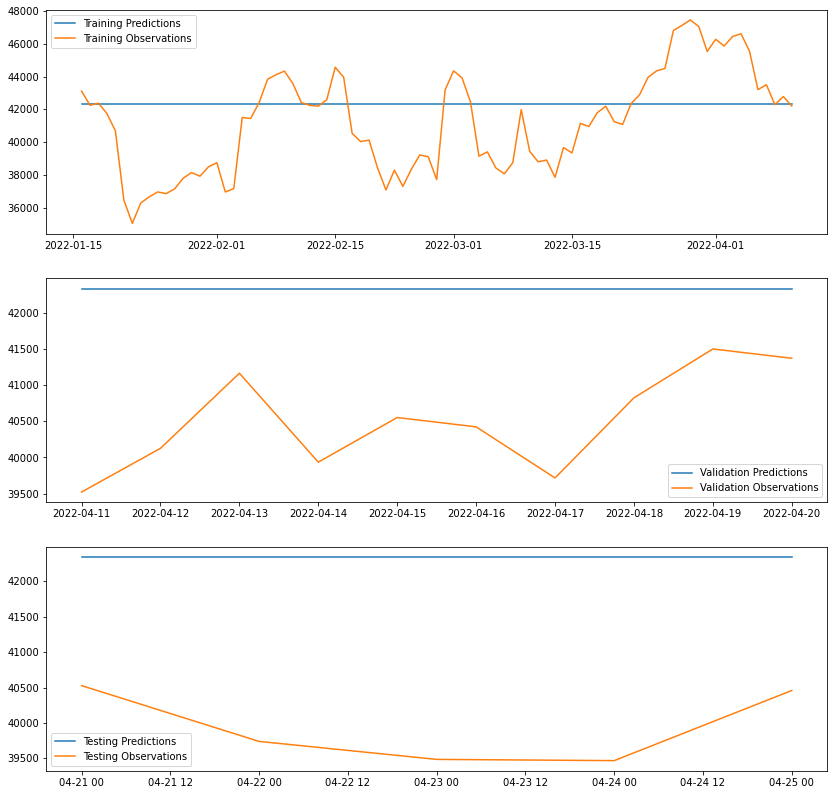

In [28]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [29]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

extra_dates = np.array(['2022-05-09', '2022-05-10', '2022-05-11'])
recursive_dates = np.append(recursive_dates,extra_dates)

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

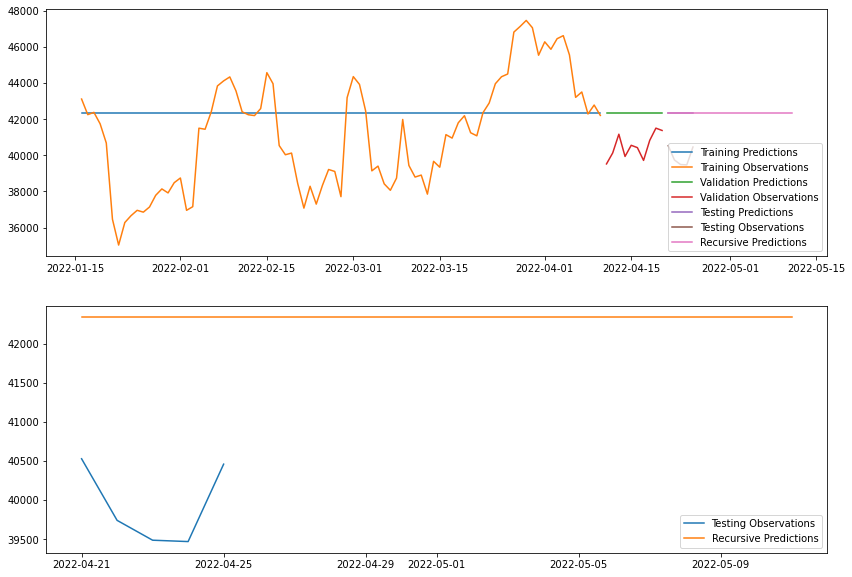

In [30]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [31]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('BTC-USD', 42339.605)